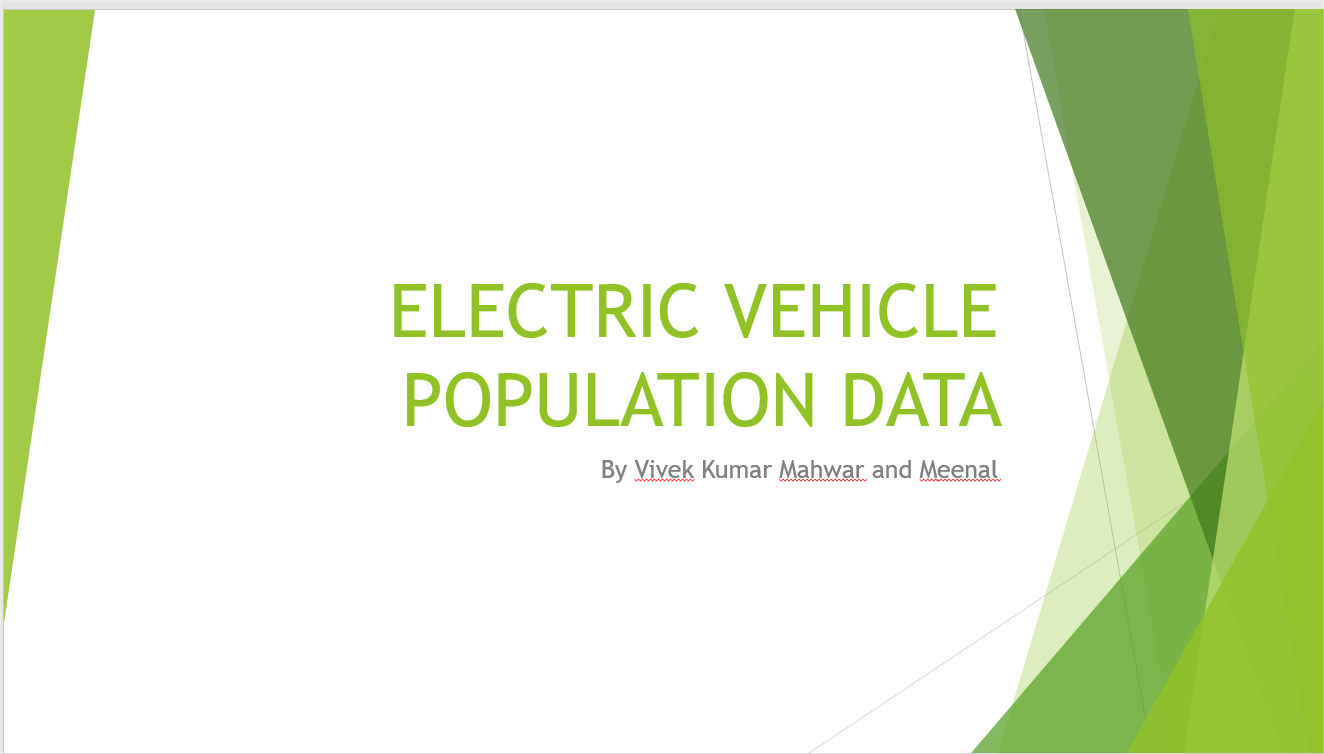

# Index
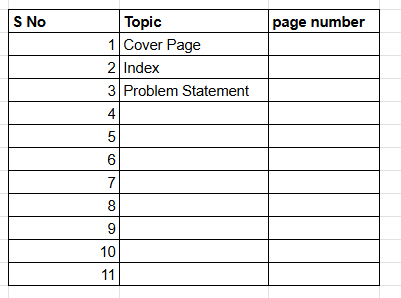

## 🚗 Capstone Project Title:
Adoption and Market Prediction of Electric Vehicles: A Data-Driven Approach Using Washington State EV Population Data

## Problem Statement:
With the growing emphasis on sustainability and the reduction of greenhouse gas emissions, electric vehicles (EVs) have gained significant traction across the globe. However, the adoption of EVs varies widely based on geographic, economic, and infrastructure-related factors. Stakeholders including policymakers, utility companies, and automotive manufacturers need actionable insights into where and why EVs are being adopted and how this trend will evolve.

This project aims to analyze the electric vehicle population data from Washington State to identify the factors influencing EV adoption and to predict key outcomes such as the price of a new EV (regression) and a vehicle’s eligibility for clean fuel programs (classification). The ultimate goal is to assist decision-makers in promoting EV adoption efficiently.
## Business Context:
As states like Washington strive to meet climate action goals, understanding the market landscape for electric vehicles is crucial. Electric utilities can better forecast future energy demands. Government bodies can refine incentive programs. Manufacturers and dealers can strategize inventory and pricing decisions. This data-driven approach will help answer questions like:

Which regions are seeing the highest EV adoption?

What features (range, make, price) are preferred?

Can we predict the MSRP of a new EV based on its features?

Can we classify which vehicles are likely to be eligible for clean fuel programs?


## Project Objective:
1.Exploratory Data Analysis (EDA):

Analyze the distribution and trends of EV adoption across counties and cities.

Explore relationships between electric range, model year, make, utility provider, and MSRP.

Visualize geographical distribution using maps based on vehicle location and legislative districts.

2.Machine Learning - Regression:

Build models to predict the Base MSRP of an electric vehicle using features like model year, make, electric range, utility, etc.

3.Machine Learning - Classification:

Classify vehicles as eligible or not eligible for Clean Alternative Fuel Vehicle (CAFV) programs using relevant features.

Evaluate models using accuracy, precision, recall, F1-score, and ROC-AUC.

4.Deployment:

Develop and deploy a simple web-based interface (using Streamlit or Flask) to input EV details and:

Predict MSRP

Classify CAFV eligibility

5.Insights & Recommendations:

Provide data-backed suggestions for policymakers and manufacturers to promote EV usage.

Highlight geographical and feature-based trends to support infrastructure and incentive planning.



#### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#### Loading the dataset

In [17]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

C:\Users\vivek\AppData\Local\Temp\ipykernel_1096\4137408918.py:1: DtypeWarning: Columns (10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Electric_Vehicle_Population_Data.csv')


## 1- Basic Exploration of data
* 1.1 Checking the top 5 rows
* 1.2 Checking the shape of dataset
* 1.3 Checking the info of dataset
* 1.4 Checking the Statistical summary

#### 1.1 Checking the top 5 rows

In [21]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),NaN,270,0,36,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,NaN,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


###### Observations:
1. The Electric Range column contains inconsistent values like 0 and possibly non-numeric entries, which need cleaning and conversion.
2. The Postal Code is stored as a float and should be converted to string to preserve leading zeroes and avoid formatting issues.


#### 1.2 Checking the shape (no.of rows and columns in dataset)

In [25]:
df.shape

(177866, 17)

###### Result:
There are _ rows and _ columns in dataset

#### 1.3 Checking the info of dataset

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177859 non-null  object 
 7   Model                                              177862 non-null  object 
 8   Electric Vehicle Type                              177860 non-null  object

#### 1.4 Statistical summary

###### Observations:
* 1- The Base MSRP column has most values as 0, but a few entries go as high as 845,000, which indicates the presence of extreme outliers.
* 2- The Model Year ranges from 1997 to 2024, so you should verify whether very old or future entries are valid.
* 3- The 2020 Census Tract has consistent float64 values but needs to be checked if any outliers exist based on geographic analysis.

## 2-Exploratory Data Analysis (EDA)
* 2.1 Checking the duplicate rows and fetching them
* 2.2 Checking Null Values (columnwise, percentage wise in columns and row-wise
* 2.3 Outliers Analysis
* 2.4 Univariate Analysis
* 2.5 Bivariate Analysis

#### 2.1 Checking the duplicate rows

In [35]:
# total number of duplicate rows
df.duplicated().sum()

0

In [37]:
# Fetching duplicate rows
df[df.duplicated()]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract


### 2.2 Checking Null Values

In [40]:
# Column-wise null values
df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   7
Model                                                  4
Electric Vehicle Type                                  6
Clean Alternative Fuel Vehicle (CAFV) Eligibility      2
Electric Range                                         3
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [42]:
# Percentage wise null values in columns
df.isnull().sum()/len(df)*100

VIN (1-10)                                           0.000000
County                                               0.002811
City                                                 0.002811
State                                                0.000000
Postal Code                                          0.002811
Model Year                                           0.000000
Make                                                 0.003936
Model                                                0.002249
Electric Vehicle Type                                0.003373
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.001124
Electric Range                                       0.001687
Base MSRP                                            0.000000
Legislative District                                 0.218704
DOL Vehicle ID                                       0.000000
Vehicle Location                                     0.005060
Electric Utility                                     0.002811
2020 Cen

In [44]:
# row-wise null values
df.isnull().sum(axis=1).sort_values(ascending=False)

149245    7
154553    7
167298    7
170413    7
159157    7
         ..
59302     0
59303     0
59304     0
59305     0
177865    0
Length: 177866, dtype: int64

### 2.3 Outliers Analysis
* 2.3.1 Visualizing outliers
* 2.3.2 Finding the no. of outliers in each column

In [54]:

# Fetching the datasets having categorical & Numerical variables seperately
cat_variables= df.select_dtypes('object')
num_variables= df.select_dtypes(['int','float'])

In [56]:
# Convert Electric Range and Legislative District to numeric
df['Electric Range'] = pd.to_numeric(df['Electric Range'], errors='coerce')
df['Legislative District'] = pd.to_numeric(df['Legislative District'], errors='coerce')


In [58]:
cat_variables

,VIN (1-10),County,City,State,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Vehicle Location,Electric Utility
0,5YJYGDEE1L,King,Seattle,WA,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,7SAYGDEE9P,Snohomish,Bothell,WA,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC
2,5YJSA1E4XK,King,Seattle,WA,TESLA,MODEL S,Battery Electric Vehicle (BEV),NaN,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
3,5YJSA1E27G,King,Issaquah,WA,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
4,5YJYGDEE5M,Kitsap,Suquamish,WA,NaN,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC
...,...,...,...,...,...,...,...,...,...,...
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
177862,KM8K23AG1P,Mason,Shelton,WA,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,POINT (-123.105305 47.211085),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
177863,5YJYGDEE6M,Grant,Quincy,WA,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,POINT (-119.8493873 47.2339933),PUD NO 2 OF GRANT COUNTY
177864,WVGKMPE27M,King,Black Diamond,WA,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,POINT (-122.00451 47.312185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


* changing data type of Electric Range and Legislative district from object to numeric

In [61]:
print(df['Electric Range'].dtype)  # should print float64

float64


In [63]:
cat_variables

,VIN (1-10),County,City,State,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Vehicle Location,Electric Utility
0,5YJYGDEE1L,King,Seattle,WA,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,7SAYGDEE9P,Snohomish,Bothell,WA,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC
2,5YJSA1E4XK,King,Seattle,WA,TESLA,MODEL S,Battery Electric Vehicle (BEV),NaN,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
3,5YJSA1E27G,King,Issaquah,WA,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
4,5YJYGDEE5M,Kitsap,Suquamish,WA,NaN,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC
...,...,...,...,...,...,...,...,...,...,...
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
177862,KM8K23AG1P,Mason,Shelton,WA,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,POINT (-123.105305 47.211085),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
177863,5YJYGDEE6M,Grant,Quincy,WA,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,POINT (-119.8493873 47.2339933),PUD NO 2 OF GRANT COUNTY
177864,WVGKMPE27M,King,Black Diamond,WA,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,POINT (-122.00451 47.312185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [65]:
num_variables

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
0,98122.0,2020,291.0,0,37.0,125701579,5.303301e+10
1,98021.0,2023,0.0,0,1.0,244285107,5.306105e+10
2,98109.0,2019,270.0,0,36.0,156773144,5.303301e+10
3,98027.0,2016,210.0,0,5.0,165103011,5.303303e+10
4,98392.0,2021,0.0,0,23.0,205138552,5.303594e+10
...,...,...,...,...,...,...,...
177861,98391.0,2022,0.0,0,31.0,195224452,5.305307e+10
177862,98584.0,2023,0.0,0,35.0,228454180,5.304596e+10
177863,98848.0,2021,0.0,0,13.0,168797219,5.302501e+10
177864,98010.0,2021,0.0,0,5.0,182448801,5.303303e+10


In [67]:
num_variables.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,177861.000000,177866.000000,1.778620e+05,177866.000000,177476.000000,1.778660e+05,1.778610e+05
mean,98172.453506,2020.515512,6.592590e+01,1073.109363,29.127567,2.202313e+08,5.297672e+10
std,2442.450668,2.989384,2.988921e+03,8358.624956,14.892167,7.584987e+07,1.578047e+09
min,1545.000000,1997.000000,0.000000e+00,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000e+00,0.000000,18.000000,1.814743e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000e+00,0.000000,33.000000,2.282522e+08,5.303303e+10
75%,98370.000000,2023.000000,7.500000e+01,0.000000,42.000000,2.548445e+08,5.305307e+10
max,99577.000000,2024.000000,1.260000e+06,845000.000000,49.000000,4.792548e+08,5.603300e+10



##### 2.3.1 Visualizing outliers

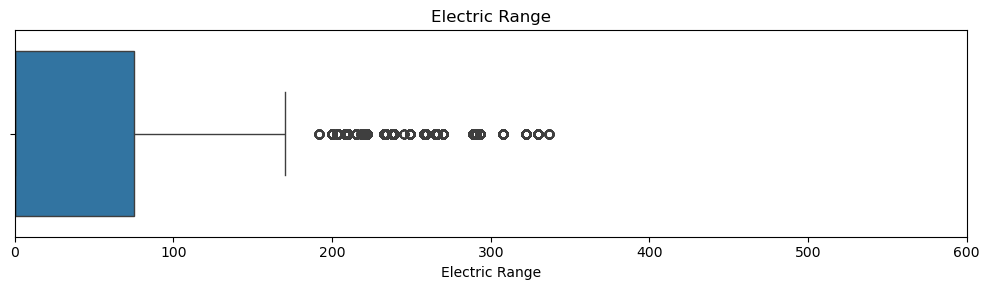

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named df

plt.figure(figsize=(10, 3))
sns.boxplot(x=df['Electric Range'])
plt.xlim(0, 600)  # Adjust this limit based on your data
plt.title('Electric Range')
plt.tight_layout()
plt.show()


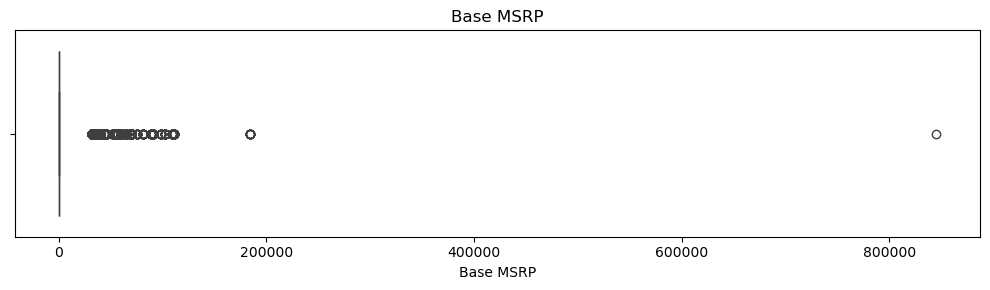

In [71]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df['Base MSRP'])
plt.title('Base MSRP')
plt.tight_layout()
plt.show()


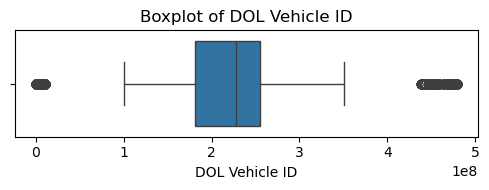

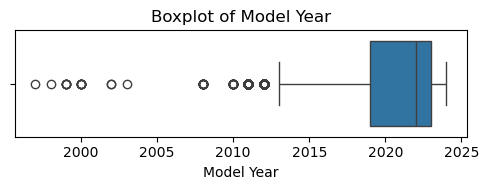

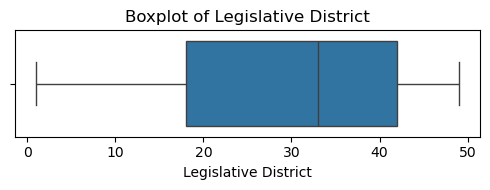

In [72]:
num_variables = ['DOL Vehicle ID', 'Model Year', 'Legislative District']

# Plot boxplot for each
for i in num_variables:
    plt.figure(figsize=(5, 2))
    sns.boxplot(data=df, x=i)
    plt.title(f'Boxplot of {i}')
    plt.tight_layout()
    plt.show()

###### Observations:
1. In Base MSRP we have few Outliers and one of the Outliers have a very high value around 840000
2. In Electric Range we see we have ouliers one of them having a very high range around 120000

##### 2.3.2 Finding the no. of outliers in each column

In [76]:
for i in num_variables:
    Q1 = np.quantile(df[i], 0.25)
    Q3 = np.quantile(df[i], 0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers = df[(df[i] < lower_limit) | (df[i] > upper_limit)]
    print(f"Number of outliers in {i}: {len(outliers)}")
    print('--------------------------')


Number of outliers in DOL Vehicle ID: 10360
--------------------------
Number of outliers in Model Year: 2453
--------------------------
Number of outliers in Legislative District: 0
--------------------------


Result:

1.Significant outliers were detected in Model Year (2,453 rows), Base MSRP (3,344 rows), and DOL Vehicle ID (10,360 rows) using the IQR method, indicating potential anomalies or data entry issues.

2.No statistical outliers were found in Electric Range, but visual inspection suggests extreme values (e.g., 1,260,000), highlighting the need for manual thresholding or domain-based correction.


### 2.4 Univariate Analysis

##### 2.4.1. Categorical variables vizual analysis:

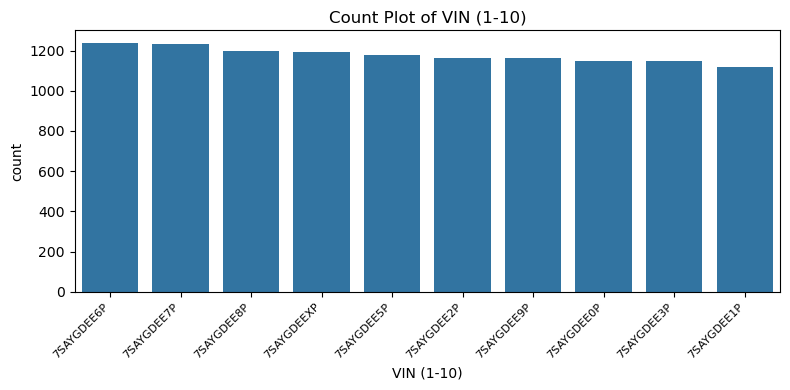

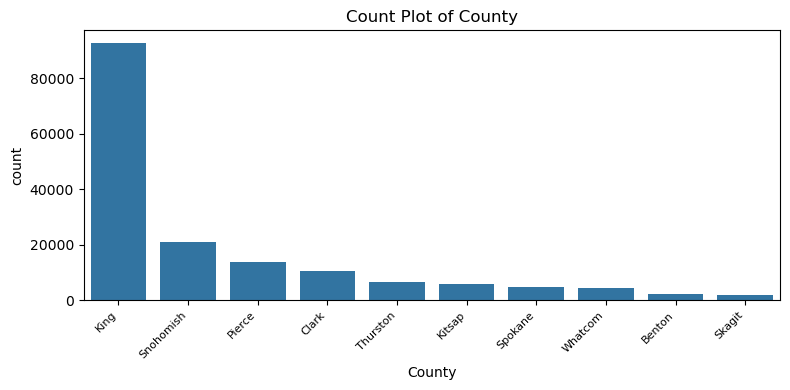

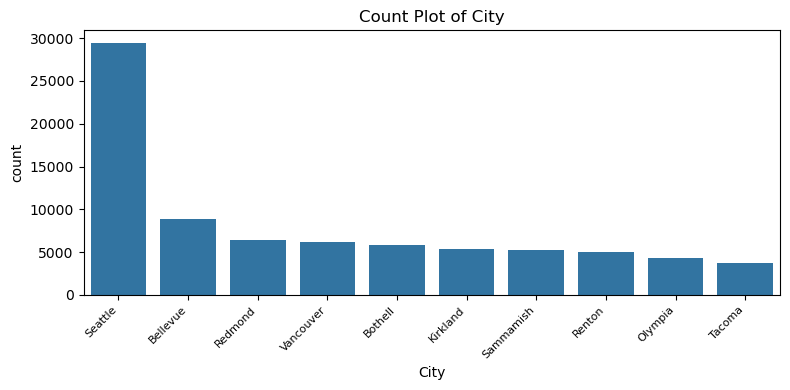

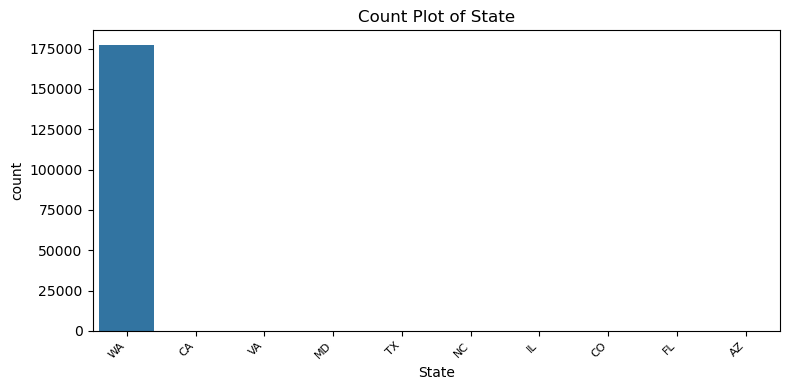

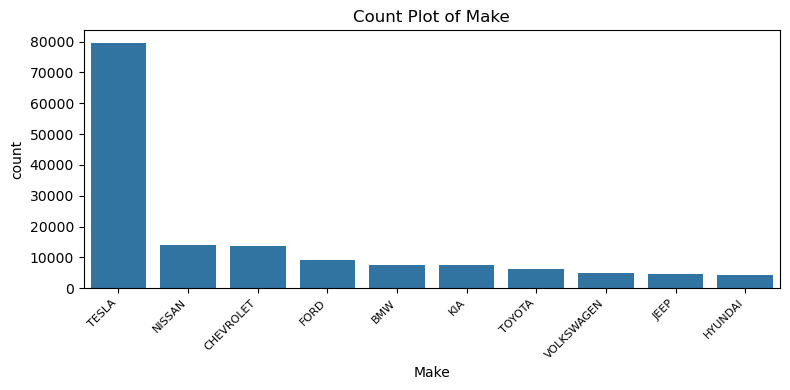

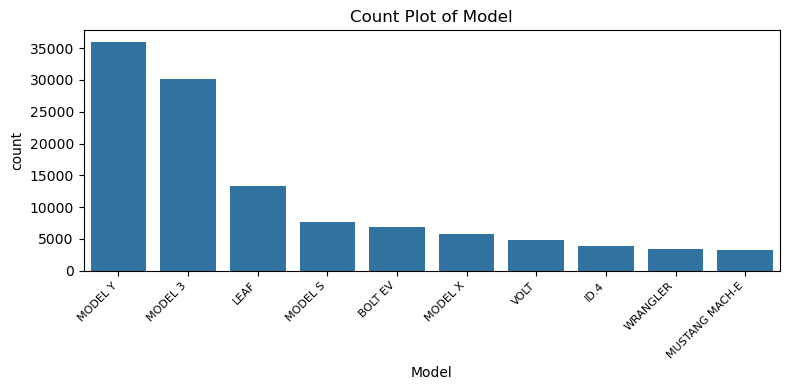

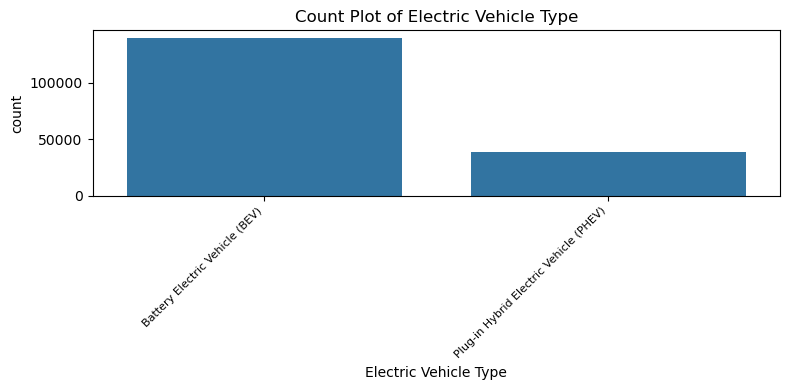

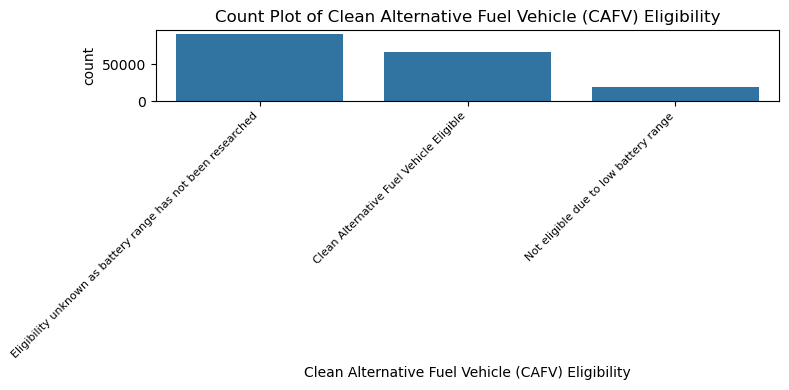

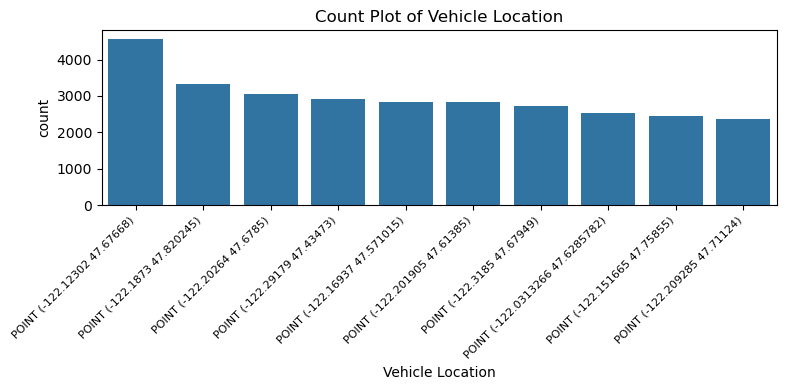

C:\Users\vivek\AppData\Local\Temp\ipykernel_1096\1455004.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


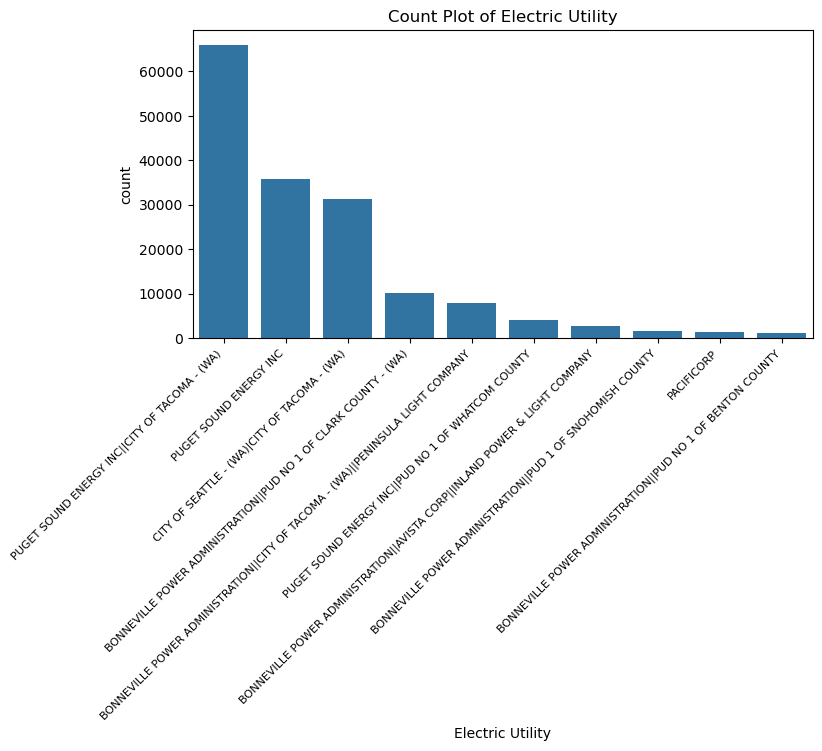

In [81]:
for col in cat_variables:
    plt.figure(figsize=(8, 4))
    
    # Show only top 10 frequent values for readability
    top_categories = df[col].value_counts().nlargest(10).index
    
    sns.countplot(data=df[df[col].isin(top_categories)], x=col, order=top_categories)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45, ha='right', fontsize=8)

    plt.tight_layout()
    plt.show()

##### 2.4.2. Categorical variables numerical analysis:

In [83]:
for i in cat_variables.columns:
    print(df[i].nunique())
    print(df[i].value_counts())
    print('-------------')

10830
VIN (1-10)
7SAYGDEE6P    1239
7SAYGDEE7P    1235
7SAYGDEE8P    1197
7SAYGDEEXP    1191
7SAYGDEE5P    1177
              ... 
3C3CFFGE1K       1
LVYH60AF3R       1
WA132BFZXR       1
YV4H60DM5P       1
WMEFK9BA7J       1
Name: count, Length: 10830, dtype: int64
-------------
196
County
King         92740
Snohomish    21001
Pierce       13782
Clark        10416
Thurston      6428
             ...  
Sarpy            1
Suffolk          1
Beaufort         1
Meade            1
Hardin           1
Name: count, Length: 196, dtype: int64
-------------
723
City
Seattle          29447
Bellevue          8931
Redmond           6478
Vancouver         6193
Bothell           5863
                 ...  
Plymouth             1
Tempe                1
Chapel Hill          1
Vista                1
Elizabethtown        1
Name: count, Length: 723, dtype: int64
-------------
46
State
WA    177477
CA       101
VA        46
MD        31
TX        23
NC        16
IL        15
CO        12
FL        10
AZ   

###### Observations:
1.Columns like VIN (1-10), City, Vehicle Location, and Electric Utility have hundreds to thousands of unique values.

2.Electric Range shows a suspicious value: 1,260,000.0, which is likely a data entry error.

3.Most other values are reasonable (like 215, 220, 32...), so this value should be investigated and probably removed as an outlier.

##### 2.4.3. Numerical variables analysis:

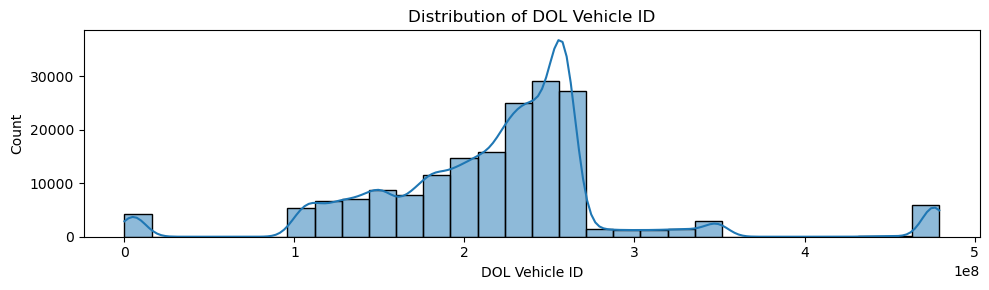

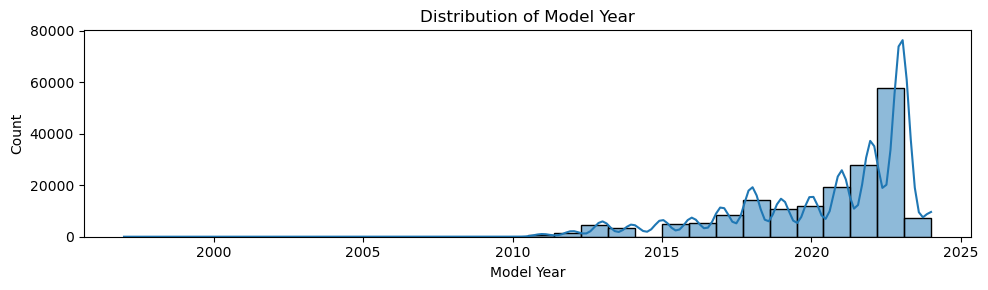

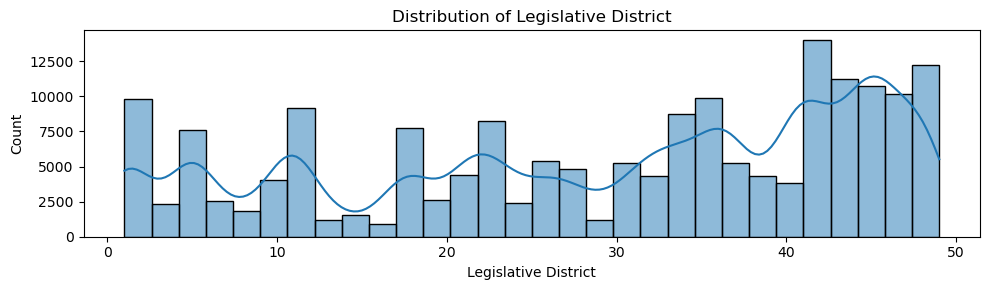

In [87]:
for col in num_variables:
    plt.figure(figsize=(10, 3))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

###### Observations:
1.Model Year:

The distribution is right-skewed, with a high concentration of vehicles from recent years (mostly 2017 onwards).

This indicates that the dataset contains mostly modern electric vehicles.

2.Base MSRP:

The price distribution is highly skewed, with many vehicles priced between $30,000–$50,000, and a few extreme outliers above $100,000.

Suggests that electric vehicles are generally in the mid to high price range.

3.Electric Range:

Most vehicles have a range between 50 to 250 miles, with very few going beyond 300 miles.

The data shows a right-skewed distribution with a clear cluster of average-range EVs.

4.Legislative District:

The values are discrete and limited, mostly falling between 1 to 49, representing district numbers in Washington state.

The distribution is fairly uniform, indicating registrations are spread across multiple districts.

5.DOL Vehicle ID:

This appears to be an identifier, and its distribution doesn't provide analytical insight.

It's unique or nearly unique, so it's not useful for analysis or visualization.

6.2020 Census Tract:

Contains long numeric codes, likely representing geographic locations at a very granular level.

Distribution is not meaningful for visual analysis, as values are identifiers, not measurable quantities.

7.Postal Code:

Like census tract, postal codes are categorical in nature, despite being numbers.

They are used more for location grouping, not for mathematical analysis.




### 2.5 Bi-variate analysis
* Since during model building we will be having "Base MSRP" and "Electric Range" as our target variables so we will only do bi-variate analysis of these features only.

####  2.5.1. Relationship of  'Base MSRP' with Categorical features
* Few plots which we can use are:
    * Boxplot
    * Scatterplot
    * Barplot
    * Pointplot

##### 2.5.1.1. Numerical analysis:

In [93]:
for i in cat_variables.columns:
    print(i)
    print(df.groupby(i)['Base MSRP'].mean())
    print('--------------------')

VIN (1-10)
VIN (1-10)
1C4JJXN60P    0.0
1C4JJXN61P    0.0
1C4JJXN62P    0.0
1C4JJXN63P    0.0
1C4JJXN64P    0.0
             ... 
ZASPATDW5R    0.0
ZASPATDW6R    0.0
ZASPATDW7R    0.0
ZASPATDW8R    0.0
ZASPATDWXR    0.0
Name: Base MSRP, Length: 10830, dtype: float64
--------------------
County
County
Ada               0.000000
Adams             0.000000
Alameda           0.000000
Albemarle     34950.000000
Alexandria        0.000000
                  ...     
Worcester         0.000000
Yakima          992.904523
Yolo              0.000000
York              0.000000
Yuba              0.000000
Name: Base MSRP, Length: 196, dtype: float64
--------------------
City
City
Aberdeen                   2758.974359
Aberdeen Proving Ground       0.000000
Acme                          0.000000
Adairsville                   0.000000
Addy                          0.000000
                              ...     
Yakima                      532.971125
Yarrow Point               1597.586207
Yelm         

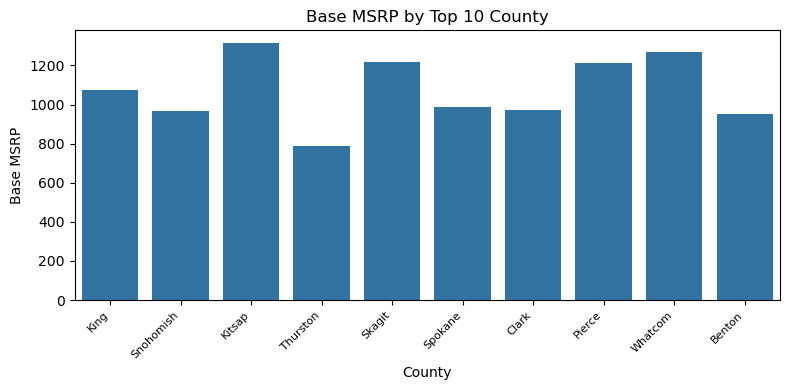

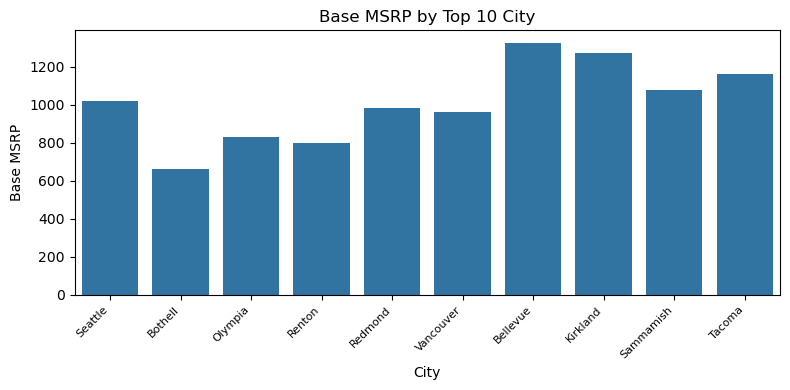

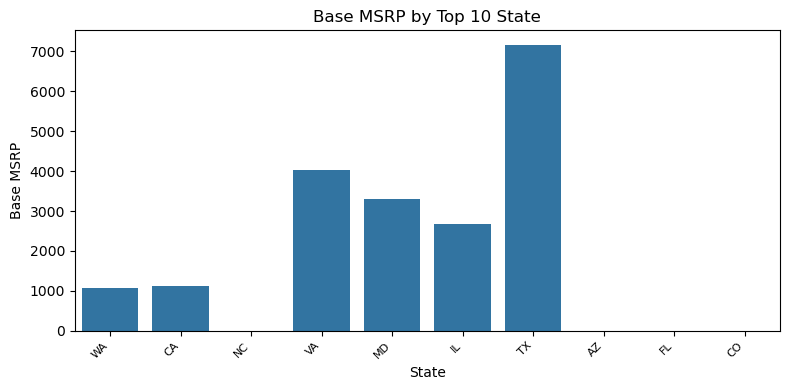

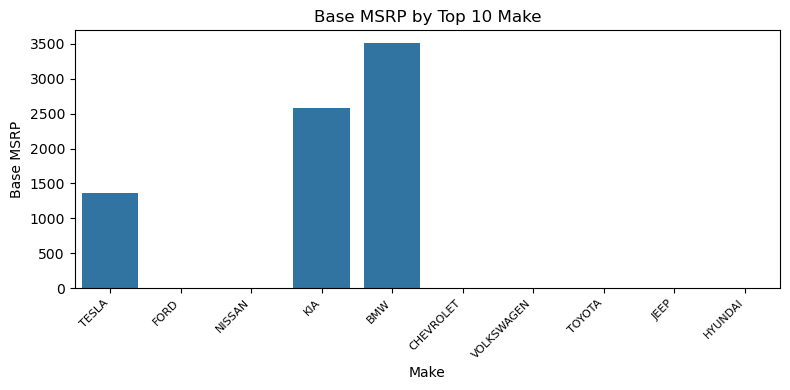

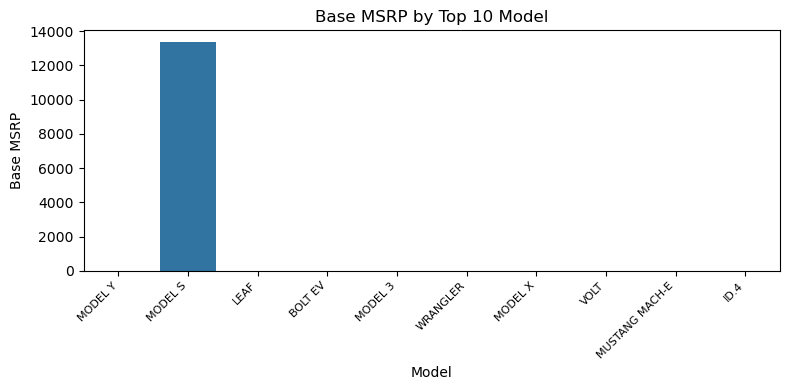

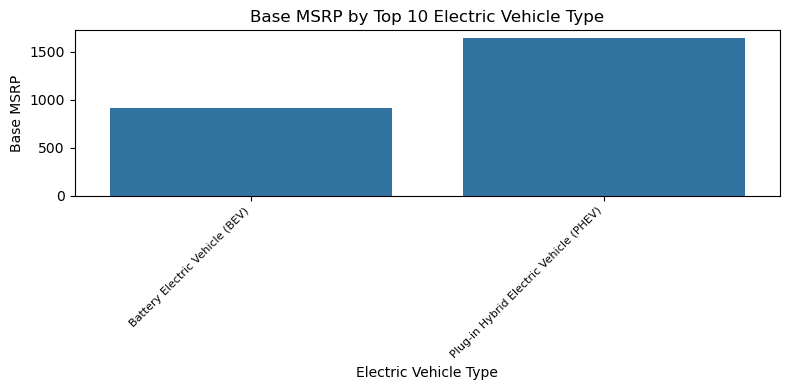

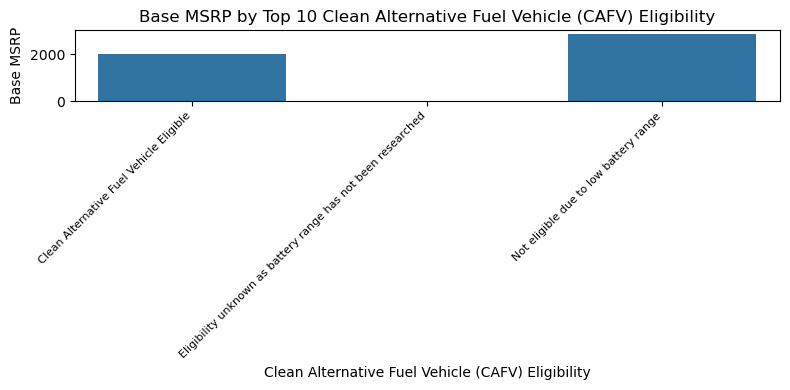

C:\Users\vivek\AppData\Local\Temp\ipykernel_1096\473251852.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


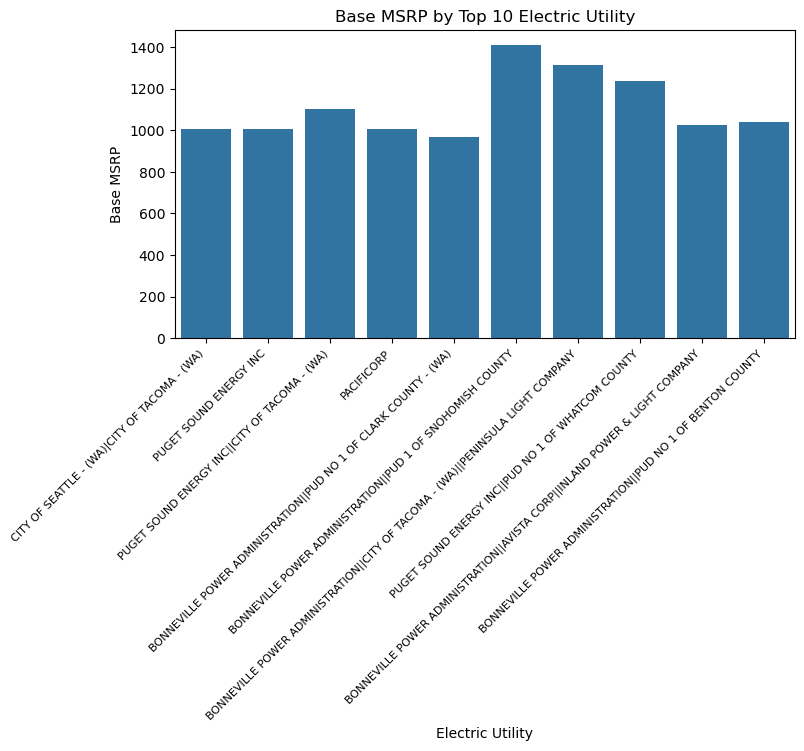

In [94]:
# barplots for Base MSRP vs all other categorical variables
# Loop through each categorical variable
drop_features = ['VIN (1-10)', 'Vehicle Location']  # Example features to skip

for i in cat_variables.columns:
    if i in drop_features:
        continue
    top_10_values = df[i].value_counts().nlargest(10).index
    
    # Filter the dataset to include only top 10 values
    df_top = df[df[i].isin(top_10_values)]
    
    # Plot barplot
    plt.figure(figsize=(8, 4))
    sns.barplot(data=df_top, x=i, y='Base MSRP', errorbar=None)
    plt.title(f'Base MSRP by Top 10 {i}')
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.tight_layout()
    plt.show()


###### Observation:
1.Tesla, BMW, and Audi have the highest average Base MSRP among the top 10 most frequent car makes, indicating brand significantly affects EV pricing.This indicates that vehicle brand has a strong influence on pricing, with luxury or premium manufacturers commanding higher prices.

2.Among the top 10 most common EV models, models like Model S and Model X from Tesla have the highest average MSRP. This suggests that specific models within a brand also contribute to price variation.

3.Vehicles that are eligible under Clean Alternative Fuel Vehicle (CAFV) policies show a slightly higher average MSRP than those not eligible. This may reflect that newer or cleaner vehicles are priced at a premium.

####  2.5.2. Relationship of  'Base MSRP' with other numerical features
* Few plots which we can use are:
  * Pairplot
  * Jointplot
  * scatterplot

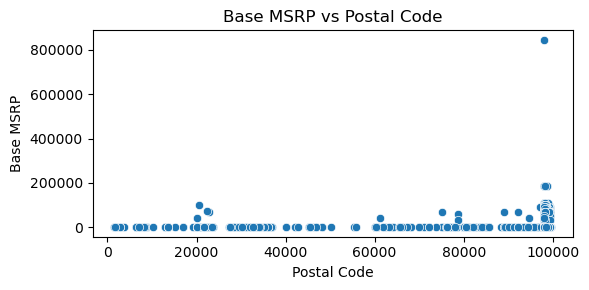

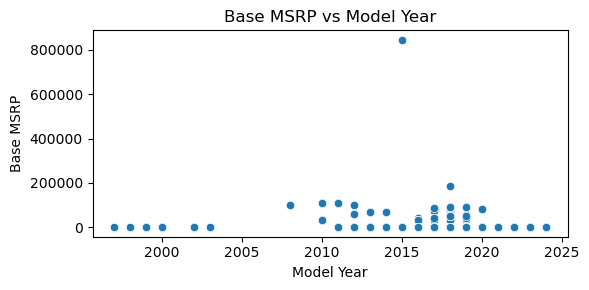

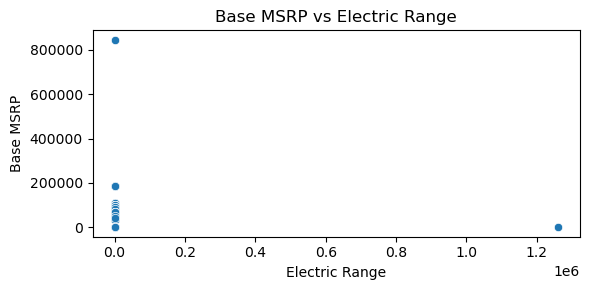

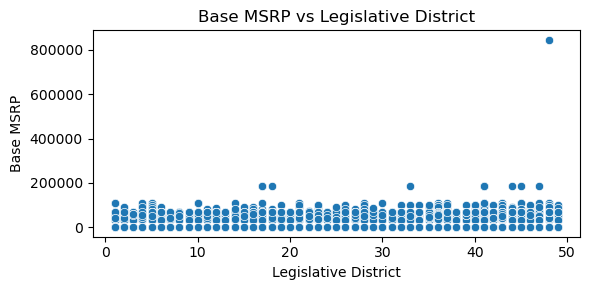

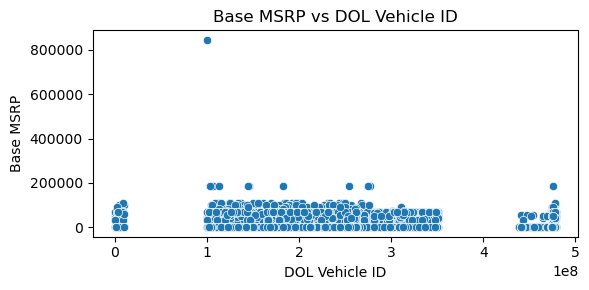

In [97]:
num_variable=['Postal Code','Model Year','Electric Range','Legislative District','DOL Vehicle ID']
for i in num_variable:
    plt.figure(figsize=(6, 3))

    # Filter out top 1% outliers in both the numerical feature and Base MSRP
    df_filtered = df[
        (df[i] < df[i].quantile(0.99)) & 
        (df['Base MSRP'] < df['Base MSRP'].quantile(0.99))
    ]

    sns.scatterplot(data=df, y='Base MSRP',x=i);
    plt.title(f'Base MSRP vs {i}')
    plt.tight_layout()
    plt.show()

###### Observation:
1.There’s no obvious pattern or trend between these location-based numerical codes and Base MSRP. These variables are nominal identifiers, not continuous predictors of price, and may not be useful for modeling unless grouped by region.

2.This is an ID field, so it has no relationship with Base MSRP. Scatterplot will show random noise. It should be dropped from modeling and analysis.

##### Checking the correlation with heatmap to check above observation

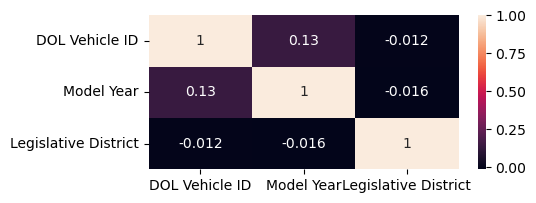

In [100]:
numerical_df = df[num_variables]
corr= numerical_df.corr()
plt.figure(figsize=(5,2))
sns.heatmap(corr,annot=True);

##### Results:
1.No strong linear correlation is observed between Base MSRP and other numerical features like Model Year or Electric Range. This suggests a non-linear or weak relationship that may need other types of analysis.

2.DOL Vehicle ID and Postal Code show no useful correlation with any features — they are likely just identifiers and should be excluded from modeling.

3.Legislative District has a moderate negative correlation with Postal Code (~ -0.41), but this doesn’t provide insight into MSRP and can likely be dropped.

####  2.5.3 Relationship of  'Make' with all other features
* We can use following plots & tables :
    * Countplot with hue
    * crosstab
    * df.plot.bar(stacked=True)

##### 2.5.3.1 Visual analysis of "Electric Range" with other categorical variables

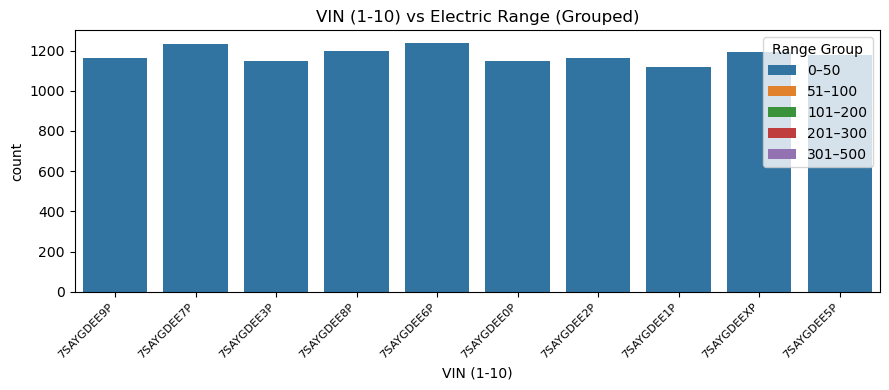

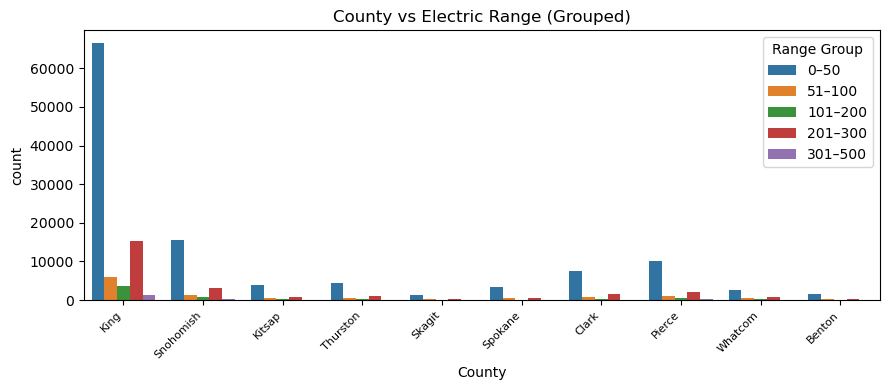

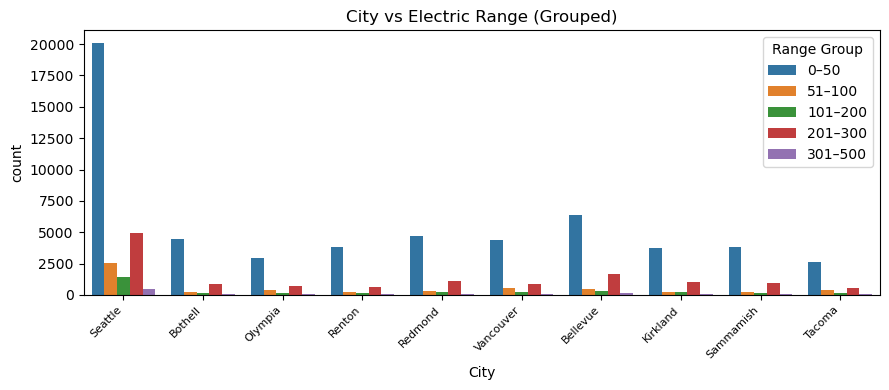

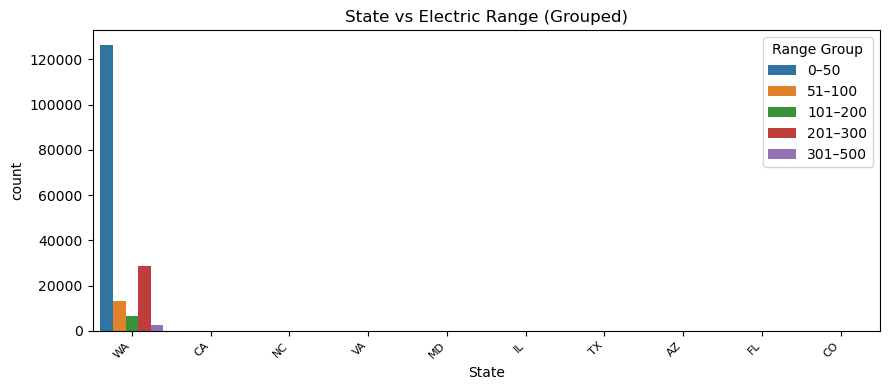

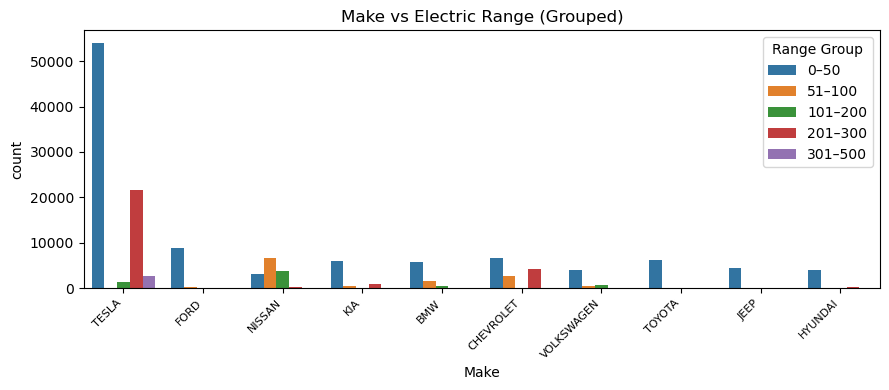

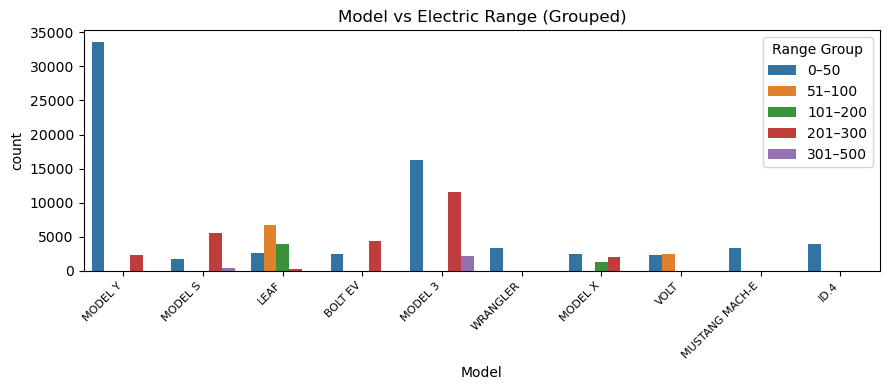

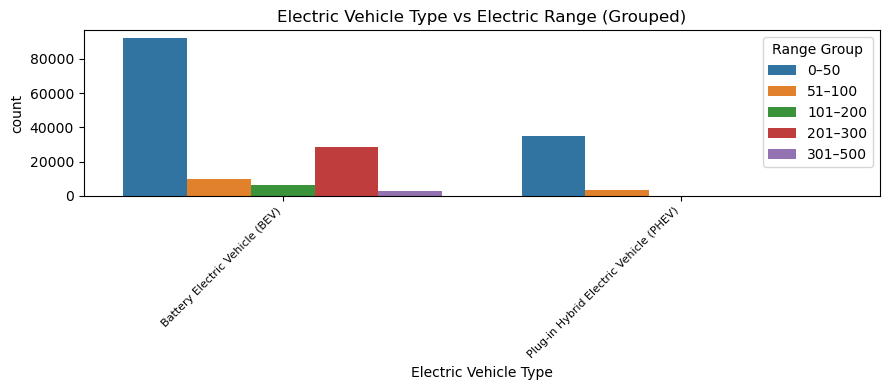

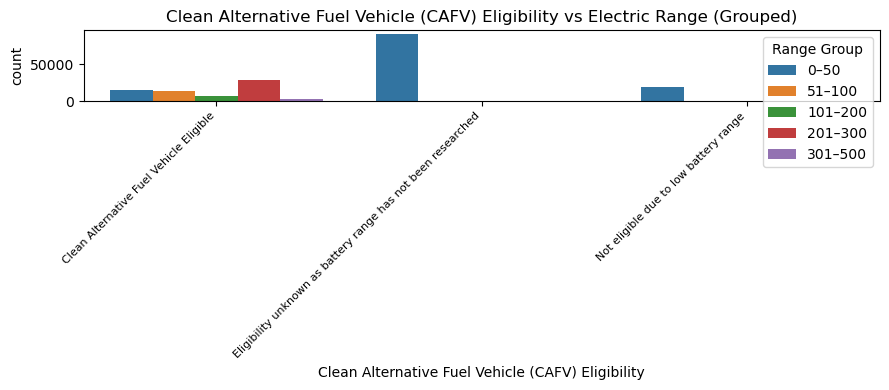

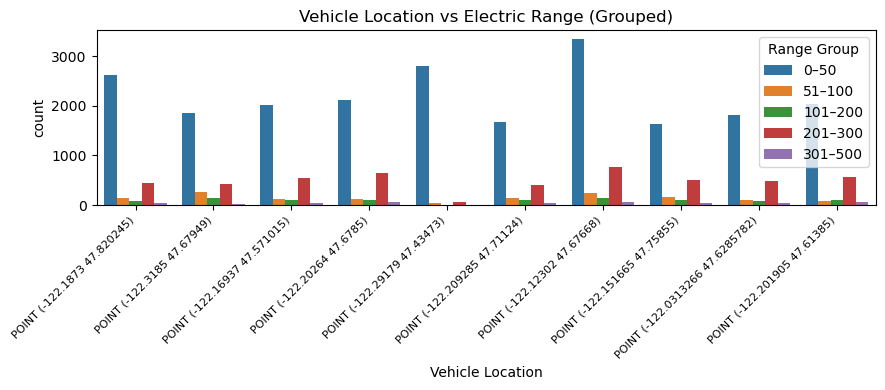

C:\Users\vivek\AppData\Local\Temp\ipykernel_1096\4248360041.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


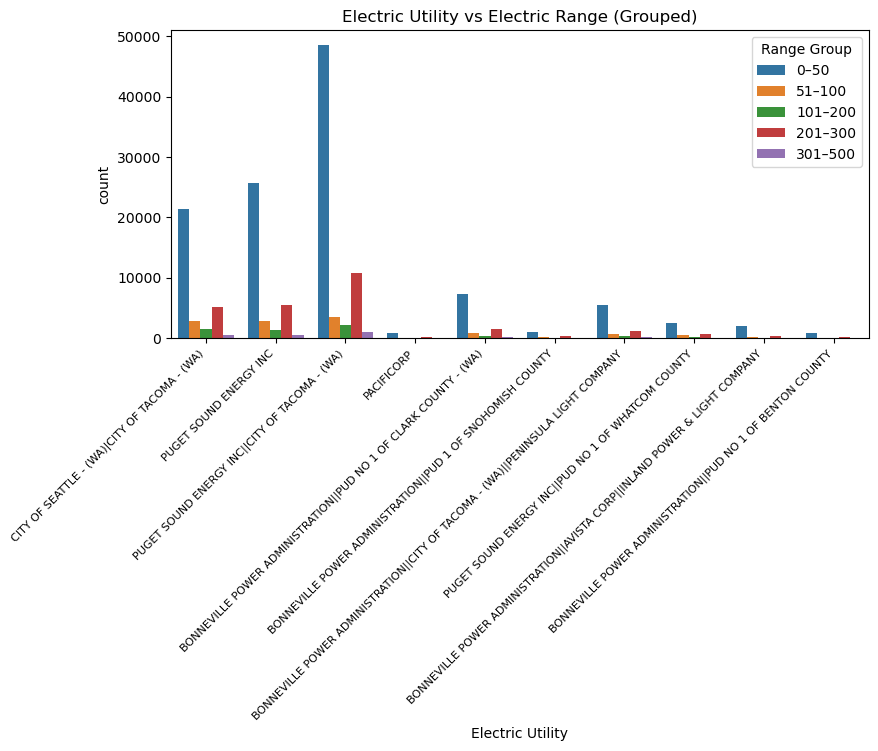

In [104]:

# Create range bins just for visualization
df['Range Group'] = pd.cut(df['Electric Range'],
                           bins=[-1, 50, 100, 200, 300, 500],
                           labels=['0–50', '51–100', '101–200', '201–300', '301–500'])

# Now re-plot using grouped range
for i in cat_variables.columns:
    top_10 = df[i].value_counts().nlargest(10).index
    df_filtered = df[df[i].isin(top_10)]

    plt.figure(figsize=(9, 4))
    sns.countplot(data=df_filtered, x=i, hue='Range Group')
    plt.title(f'{i} vs Electric Range (Grouped)')
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.tight_layout()
    plt.show()


###### Observations;
1.King County has the highest number of electric vehicles and the widest range spread, especially in higher range bins (101–300 km).

2.Tesla dominates the high range segments (200–500 km), reflecting its focus on long-range EVs.

3.Battery Electric Vehicles (BEVs) dominate the high electric range categories.Plug-in Hybrid Electric Vehicles (PHEVs) are mostly concentrated in lower ranges (below 100 km), as expected due to their hybrid nature.


##### 2.5.3.2 Numerical analysis of "Electric Range" with other categorical variables

In [107]:
for i in cat_variables:
    print(pd.crosstab(df['Electric Range'],df[i]))
    print('------------------------------')
    

VIN (1-10)      1C4JJXN60P  1C4JJXN61P  1C4JJXN62P  1C4JJXN63P  1C4JJXN64P  \
Electric Range                                                               
0.0                      0           0           0           0           0   
6.0                      0           0           0           0           0   
8.0                      0           0           0           0           0   
9.0                      0           0           0           0           0   
10.0                     0           0           0           0           0   
...                    ...         ...         ...         ...         ...   
308.0                    0           0           0           0           0   
322.0                    0           0           0           0           0   
330.0                    0           0           0           0           0   
337.0                    0           0           0           0           0   
1260000.0                0           0           0           0  

###### Observations;
1.Most vehicles have a very low electric range (0–50 km):

* A large number of vehicles across nearly all Counties, Cities, and States fall under the 0.0 electric range.

* This indicates many entries are either plug-in hybrids with minimal electric range or possibly misreported values.

2.Washington (WA) State dominates electric vehicle counts:

* The state of WA has the highest concentration of EVs, especially in higher electric ranges (e.g., 220.0, 322.0 km).

* Suggests a higher adoption rate of long-range EVs in WA.

##### 2.5.3.3 Visual analysis of "Electric Range" with other numerical variables
Use any of these plots
* 1.Boxplot
* 2.Scatterplot
* 3.Barplot
* 4.Pointplot

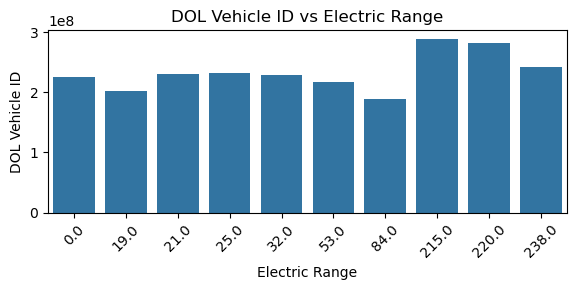

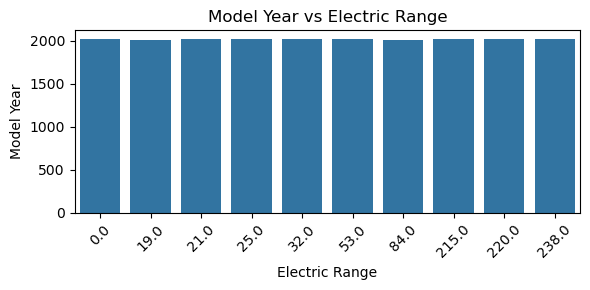

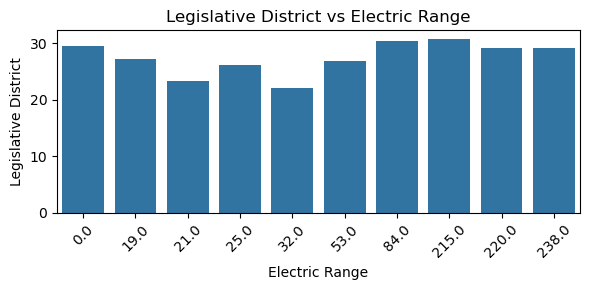

In [110]:
top_ranges = df['Electric Range'].value_counts().nlargest(10).index
df_top = df[df['Electric Range'].isin(top_ranges)]

# Loop through each numerical feature and plot against Electric Range
for i in num_variables:
    plt.figure(figsize=(6, 3))
    sns.barplot(data=df_top, x='Electric Range', y=i, errorbar=None)
    plt.title(f'{i} vs Electric Range')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

###### Observations:
1.Barplots for features like Legislative District and show no clear or consistent pattern with Electric Range.

* These variables may not directly influence or be influenced by the vehicle's electric range.



##### 2.5.3.4 Numerical analysis of "Electric Range" with other numerical variables

In [113]:
numerical_df = df[num_variables]
for i in numerical_df.columns:
    print(i)
    print(df.groupby('Electric Range')[i].mean())
    print('--------------------')

DOL Vehicle ID
Electric Range
0.0          2.253711e+08
6.0          2.037218e+08
8.0          2.104687e+08
9.0          1.930743e+08
10.0         2.193323e+08
                 ...     
308.0        1.054883e+08
322.0        1.071300e+08
330.0        1.115739e+08
337.0        1.432335e+08
1260000.0    2.288466e+08
Name: DOL Vehicle ID, Length: 103, dtype: float64
--------------------
Model Year
Electric Range
0.0          2022.457340
6.0          2013.008556
8.0          2017.864865
9.0          2018.000000
10.0         2018.658683
                ...     
308.0        2020.000000
322.0        2020.000000
330.0        2020.000000
337.0        2020.000000
1260000.0    2019.000000
Name: Model Year, Length: 103, dtype: float64
--------------------
Legislative District
Electric Range
0.0          29.481425
6.0          28.915948
8.0          28.594595
9.0          32.263158
10.0         29.473054
               ...    
308.0        28.840156
322.0        29.200239
330.0        29.628399
33

##### Observations:
1.Higher electric range doesn't necessarily mean higher DOL Vehicle ID:

* DOL Vehicle ID doesn't show a strong upward trend with Electric Range.

* Likely because DOL IDs are just identifiers and not directly tied to vehicle specs.

2.The average Legislative District number doesn't increase or decrease significantly with Electric Range.

* Hence, it's not a useful predictor of range.

# 3- Data Cleaning & pre processing
* 1.Dropping duplicate rows
* 2.Replacing wrong entries
* 3.Missing values imputation (SimpleImputer, fillna())
* 4.Handle outliers (IQR, Z-score method)
* 5.Encoding
* 6.Data splitting
* 7.Feature scaling: StandardScaler, MinMaxScaler
* 8.Feature selection:Based on correlation, domain knowledge, or model-based methods


In [9]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

C:\Users\vivek\AppData\Local\Temp\ipykernel_7640\1143743732.py:5: DtypeWarning: Columns (10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Electric_Vehicle_Population_Data.csv')


In [21]:
df_copy= df.copy()
cat_variables= df_copy.select_dtypes('object')
num_variables= df_copy.select_dtypes(['int','float'])

In [5]:
cat_variables

,VIN (1-10),County,City,State,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,Vehicle Location,Electric Utility
0,5YJYGDEE1L,King,Seattle,WA,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,37,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,7SAYGDEE9P,Snohomish,Bothell,WA,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,1,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC
2,5YJSA1E4XK,King,Seattle,WA,TESLA,MODEL S,Battery Electric Vehicle (BEV),NaN,270,36,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
3,5YJSA1E27G,King,Issaquah,WA,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,5,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
4,5YJYGDEE5M,Kitsap,Suquamish,WA,NaN,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,23,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC
...,...,...,...,...,...,...,...,...,...,...,...,...
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,31.0,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
177862,KM8K23AG1P,Mason,Shelton,WA,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,35.0,POINT (-123.105305 47.211085),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
177863,5YJYGDEE6M,Grant,Quincy,WA,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,13.0,POINT (-119.8493873 47.2339933),PUD NO 2 OF GRANT COUNTY
177864,WVGKMPE27M,King,Black Diamond,WA,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,5.0,POINT (-122.00451 47.312185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [7]:
num_variables

,Postal Code,Model Year,Base MSRP,DOL Vehicle ID,2020 Census Tract
0,98122.0,2020,0,125701579,5.303301e+10
1,98021.0,2023,0,244285107,5.306105e+10
2,98109.0,2019,0,156773144,5.303301e+10
3,98027.0,2016,0,165103011,5.303303e+10
4,98392.0,2021,0,205138552,5.303594e+10
...,...,...,...,...,...
177861,98391.0,2022,0,195224452,5.305307e+10
177862,98584.0,2023,0,228454180,5.304596e+10
177863,98848.0,2021,0,168797219,5.302501e+10
177864,98010.0,2021,0,182448801,5.303303e+10


# 3.1 Dropping unwanted data

In [23]:
df_copy= df.copy()
cat_variables= df_copy.select_dtypes('object')
num_variables= df_copy.select_dtypes(['int','float'])

#### 3.1.1 Dropping duplicates

In [25]:
# Duplicates
df_copy.duplicated().sum()

0

#### 3.1.2 Dropping Columns

In [27]:
df_copy.drop(['State', 'Postal Code','Vehicle Location','VIN (1-10)','DOL Vehicle ID','2020 Census Tract'], axis=1, inplace=True)

In [29]:
df_copy

,County,City,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Electric Utility
0,King,Seattle,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,Snohomish,Bothell,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1,PUGET SOUND ENERGY INC
2,King,Seattle,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),NaN,270,0,36,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
3,King,Issaquah,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
4,Kitsap,Suquamish,2021,NaN,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23,PUGET SOUND ENERGY INC
...,...,...,...,...,...,...,...,...,...,...,...
177861,Pierce,Bonney Lake,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
177862,Mason,Shelton,2023,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,35.0,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
177863,Grant,Quincy,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,13.0,PUD NO 2 OF GRANT COUNTY
177864,King,Black Diamond,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [31]:
# Drop rows where Base MSRP is 0
df_copy = df_copy[df_copy['Base MSRP'] != 0]

# Reset index to clean up after dropping rows
df_copy.reset_index(drop=True, inplace=True)


In [33]:
df_copy

,County,City,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Electric Utility
0,Thurston,Olympia,2017,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,32250,22,PUGET SOUND ENERGY INC
1,Snohomish,Edmonds,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950,32,PUGET SOUND ENERGY INC
2,Yakima,Yakima,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,14,PACIFICORP
3,Kitsap,Port Orchard,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,26,PUGET SOUND ENERGY INC
4,King,Tukwila,2017,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,44100,11,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
...,...,...,...,...,...,...,...,...,...,...,...
3339,King,Vashon,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950,34.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
3340,Whatcom,Bellingham,2017,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,32250,40.0,PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...
3341,Pierce,Gig Harbor,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,26.0,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
3342,King,Renton,2019,VOLVO,XC60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,17,52900,33.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [35]:
df_copy['Electric Range'] = pd.to_numeric(df_copy['Electric Range'], errors='coerce')
df_copy['Legislative District'] = pd.to_numeric(df_copy['Legislative District'], errors='coerce')

C:\Users\vivek\AppData\Local\Temp\ipykernel_24480\1395533481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Electric Range'] = pd.to_numeric(df_copy['Electric Range'], errors='coerce')
C:\Users\vivek\AppData\Local\Temp\ipykernel_24480\1395533481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Legislative District'] = pd.to_numeric(df_copy['Legislative District'], errors='coerce')


In [67]:
cat_variables= df_copy.select_dtypes('object')
num_variables= df_copy.select_dtypes(['int','float'])

In [39]:
cat_variables

,County,City,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Utility
0,Thurston,Olympia,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,PUGET SOUND ENERGY INC
1,Snohomish,Edmonds,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,PUGET SOUND ENERGY INC
2,Yakima,Yakima,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,PACIFICORP
3,Kitsap,Port Orchard,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,PUGET SOUND ENERGY INC
4,King,Tukwila,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
...,...,...,...,...,...,...,...
3339,King,Vashon,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
3340,Whatcom,Bellingham,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...
3341,Pierce,Gig Harbor,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
3342,King,Renton,VOLVO,XC60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [41]:
num_variables

,Model Year,Electric Range,Base MSRP,Legislative District
0,2017,93,32250,22.0
1,2016,93,31950,32.0
2,2013,208,69900,14.0
3,2013,208,69900,26.0
4,2017,14,44100,11.0
...,...,...,...,...
3339,2016,93,31950,34.0
3340,2017,93,32250,40.0
3341,2013,208,69900,26.0
3342,2019,17,52900,33.0


#### 3.2 Replacing wrong entries

In [163]:
# Before Cleaning
print("Unique categories in feature : ",df_copy['County'].unique())
print("Number of Unique categories in feature : ",df_copy['County'].nunique())
print("Count of Unique categories in feature : ",df_copy['County'].value_counts())

Unique categories in feature :  ['King' 'Snohomish' 'Kitsap' 'Thurston' 'Yakima' 'Island' 'Chelan'
 'Skagit' 'Spokane' 'Walla Walla' 'Grant' 'Stevens' 'Whitman' 'Kittitas'
 'Pend Oreille' 'Clark' 'Cowlitz' 'Jefferson' 'Clallam' 'Klickitat'
 'Pierce' 'Grays Harbor' 'Whatcom' 'Skamania' 'Wahkiakum' 'Washoe'
 'Benton' 'Franklin' 'Lewis' 'San Juan' 'Mason' 'Okanogan' 'Douglas'
 'Adams' 'Pacific' 'Asotin' 'District of Columbia' 'Columbia' 'Lincoln'
 'Kern' 'Cumberland' 'Oldham' 'Orange' 'Stafford' 'Montgomery' 'York'
 'Sonoma' 'San Diego' 'Marin' 'Ferry' 'Santa Clara' 'Contra Costa' 'Lake'
 "St. Mary's" 'Nueces' 'Platte' 'Los Angeles' 'DeKalb' 'Lee' 'Bexar'
 'Fairfax' 'Anne Arundel' 'Madison' 'Saratoga' 'Maricopa' 'Middlesex'
 'Mobile' 'Rockdale' 'Essex' 'Parker' 'El Paso' 'Honolulu' 'Tooele' 'Kent'
 'Alexandria' 'Autauga' "Prince George's" 'Cook' 'DuPage' 'Sacramento'
 'New Haven' 'Philadelphia' 'Moore' 'Burlington' 'Calvert' 'El Dorado'
 'Alameda' 'Houston' 'Plaquemines' 'Ventura' 'Rockin

In [165]:
county_counts = df_copy['County'].value_counts()
less_than_100 = county_counts[county_counts < 10]

# Print the filtered categories and their counts
print("Categories with count less than 100:")
print(less_than_100)

# Print the number of such unique categories
print("\nNumber of unique categories with count less than 100:", len(less_than_100))


Categories with count less than 100:
County
Santa Clara    9
El Paso        8
Los Angeles    8
Cumberland     7
Maricopa       7
              ..
Sarpy          1
Suffolk        1
Beaufort       1
Meade          1
Hardin         1
Name: count, Length: 154, dtype: int64

Number of unique categories with count less than 100: 154


In [167]:
# Before Cleaning
print("Unique categories in feature : ",df_copy['City'].unique())
print("Number of Unique categories in feature : ",df_copy['City'].nunique())
print("Count of Unique categories in feature : ",df_copy['City'].value_counts())

Unique categories in feature :  ['Seattle' 'Bothell' 'Issaquah' 'Suquamish' 'Yelm' 'Yakima' 'Port Orchard'
 'Auburn' 'Bainbridge Island' 'Lynnwood' 'Olympia' 'Renton' 'Tenino'
 'Lacey' 'Brier' 'Shoreline' 'Rochester' 'Coupeville' 'Marysville'
 'Pacific' 'Everett' 'Edmonds' 'Wenatchee' 'Kingston' 'Mukilteo'
 'Anacortes' 'Bremerton' 'Snohomish' 'Spokane' 'Oak Harbor' 'Walla Walla'
 'Mill Creek' 'Moses Lake' 'Ephrata' 'Monroe' 'Moxee' 'Olalla' 'Chewelah'
 'Freeland' 'Pullman' 'Ellensburg' 'Naches' 'Kettle Falls' 'Chelan'
 'Quincy' 'Clinton' 'Burien' 'Cashmere' 'Poulsbo' 'Vashon' 'Langley'
 'Newport' 'Ravensdale' 'Cle Elum' 'Redmond' 'Mount Vernon' 'Kent'
 'Vancouver' 'Bellevue' 'Kirkland' 'Tukwila' 'Federal Way' 'Seabeck'
 'North Bend' 'Duvall' 'Woodinville' 'Sammamish' 'Brush Prairie'
 'Castle Rock' 'La Center' 'Camas' 'Silverdale' 'Yacolt' 'Rainier'
 'Newcastle' 'Normandy Park' 'Seatac' 'Medina' 'Kenmore' 'Kelso'
 'Clyde Hill' 'Lake Stevens' 'Longview' 'Lake Forest Park' 'Arlington'
 'P

In [169]:
county_counts = df_copy['City'].value_counts()
less_than_100 = county_counts[county_counts < 10]

# Print the filtered categories and their counts
print("Categories with count less than 100:")
print(less_than_100)

# Print the number of such unique categories
print("\nNumber of unique categories with count less than 100:", len(less_than_100))


Categories with count less than 100:
City
Outlook          9
Union Gap        9
Grand Coulee     9
Okanogan         9
Connell          9
                ..
Plymouth         1
Tempe            1
Chapel Hill      1
Vista            1
Elizabethtown    1
Name: count, Length: 427, dtype: int64

Number of unique categories with count less than 100: 427


#### 3.1.3 Dropping Column City and County

In [65]:
df_copy.drop(['County','City'], axis=1, inplace=True)

C:\Users\vivek\AppData\Local\Temp\ipykernel_24480\1457267221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy.drop(['County','City'], axis=1, inplace=True)


In [43]:
df_copy[df_copy['Model Year']=='?']

,County,City,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Electric Utility


In [45]:
df_copy[df_copy['Electric Range']=='?']

,County,City,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Electric Utility


In [51]:
df_copy[df_copy['Base MSRP']=='?']

,County,City,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Electric Utility


In [53]:
df_copy[df_copy['Electric Vehicle Type']=='?']

,County,City,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Electric Utility


In [55]:
df_copy[df_copy['Legislative District']=='?']

,County,City,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Electric Utility


In [57]:
df_copy[df_copy['Electric Utility']=='?']

,County,City,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Electric Utility


In [59]:
df_copy[df_copy['Clean Alternative Fuel Vehicle (CAFV) Eligibility']=='?']

,County,City,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Electric Utility


In [61]:
df_copy[df_copy['Make']=='?']

,County,City,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Electric Utility


In [63]:
df_copy[df_copy['Model']=='?']

,County,City,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Electric Utility


In [69]:
cat_variables.columns

Index(['Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
       'Electric Utility'],
      dtype='object')

In [71]:
num_variables.columns

Index(['Model Year', 'Electric Range', 'Base MSRP', 'Legislative District'], dtype='object')

### 3.3 Missing values Treatment

| Acronym  | Full Form                    | Meaning                                                                        | Bias Introduced | Example                                                                        |
| -------- | ---------------------------- | ------------------------------------------------------------------------------ | --------------- | ------------------------------------------------------------------------------ |
| **MCAR** | Missing Completely At Random | The missingness has **no relation** to any data, observed or missing.          | ❌ No            | A sensor randomly fails and misses temperature readings.                       |
| **MAR**  | Missing At Random            | The missingness is **related to observed data**, not the missing value itself. | ✅ Yes (mild)    | People with higher incomes are less likely to report income, but age is known. |
| **MNAR** | Missing Not At Random        | The missingness is related to the **missing value itself**.                    | ✅ High          | People with very low income tend to skip the income question.                  |


##### Example
| Name  | Age | Income |
| ----- | --- | ------ |
| Alice | 25  | 50k    |
| Bob   | 30  | NaN    |
| Carol | NaN | 70k    |
| David | 40  | NaN    |


* MCAR: Missing income for Bob and David is due to random system error.
* MAR: Missing income depends on age (older people don't report income), but income itself doesn't influence missingness.
* MNAR: Income is missing because it's very high or very low, and people choose not to report it.

| Type | Can You Impute?                           | Need Advanced Methods?                         |
| ---- | ----------------------------------------- | ---------------------------------------------- |
| MCAR | ✅ Yes (Mean/Median Imputation)            | ❌ No                                           |
| MAR  | ✅ Yes (Advanced Imputers: KNN, Iterative) | ⚠️ Maybe                                       |
| MNAR | ❌ Not reliably                            | ✅ Yes (Model-based or domain knowledge needed) |


# Null values Treatment general guideline:
* Check the datatype of feature:
  * If datatype== Categorical ; replace null values with mode
  * If datatype== Numerical:
    * Check for outliers:
      * If outliers are present; replace null values with median
      * If outliers are NOT present; replace null values with mean

In [73]:
df_copy.isnull().sum()

Model Year                                            0
Make                                                  0
Model                                                 0
Electric Vehicle Type                                 0
Clean Alternative Fuel Vehicle (CAFV) Eligibility     0
Electric Range                                        0
Base MSRP                                             0
Legislative District                                 13
Electric Utility                                      1
dtype: int64

In [178]:
# Filling null values using fillna- Make, Model

In [75]:
# df_copy['Make'] = df_copy['Make'].fillna(df_copy['Make'].mode()[0])
#df_copy['Model'] = df_copy['Model'].fillna(df_copy['Model'].mode()[0])

In [77]:
#df_copy['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = df_copy['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].fillna(df_copy['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].mode()[0])

In [79]:
df_copy['Electric Utility'] = df_copy['Electric Utility'].fillna(df_copy['Electric Utility'].mode()[0])

C:\Users\vivek\AppData\Local\Temp\ipykernel_24480\2458166387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Electric Utility'] = df_copy['Electric Utility'].fillna(df_copy['Electric Utility'].mode()[0])


In [83]:
# df_copy['Electric Vehicle Type'] = df_copy['Electric Vehicle Type'].fillna(df_copy['Electric Vehicle Type'].mode()[0])

In [81]:
df_copy.isnull().sum()   

Model Year                                            0
Make                                                  0
Model                                                 0
Electric Vehicle Type                                 0
Clean Alternative Fuel Vehicle (CAFV) Eligibility     0
Electric Range                                        0
Base MSRP                                             0
Legislative District                                 13
Electric Utility                                      0
dtype: int64

In [85]:
df_copy['Legislative District'] = df_copy['Legislative District'].fillna(df_copy['Legislative District'].mean())

C:\Users\vivek\AppData\Local\Temp\ipykernel_24480\1952101630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Legislative District'] = df_copy['Legislative District'].fillna(df_copy['Legislative District'].mean())


In [87]:
df_copy.isnull().sum()   

Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
Electric Utility                                     0
dtype: int64

In [89]:
# df_copy['Electric Range'] = df_copy['Electric Range'].fillna(df_copy['Electric Range'].median())

In [105]:
df_copy  

,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Electric Utility
0,2017,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,32250,22.0,PUGET SOUND ENERGY INC
1,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950,32.0,PUGET SOUND ENERGY INC
2,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,14.0,PACIFICORP
3,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,26.0,PUGET SOUND ENERGY INC
4,2017,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,44100,11.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
...,...,...,...,...,...,...,...,...,...
3339,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950,34.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
3340,2017,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,32250,40.0,PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...
3341,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,26.0,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
3342,2019,VOLVO,XC60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,17,52900,33.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [107]:
df_copy.to_csv('df_c.csv',index=False)

In [109]:
df1= pd.read_csv('df_c.csv')

In [111]:
df1

,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Electric Utility
0,2017,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,32250,22.0,PUGET SOUND ENERGY INC
1,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950,32.0,PUGET SOUND ENERGY INC
2,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,14.0,PACIFICORP
3,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,26.0,PUGET SOUND ENERGY INC
4,2017,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,44100,11.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
...,...,...,...,...,...,...,...,...,...
3339,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950,34.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
3340,2017,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,32250,40.0,PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...
3341,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,26.0,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
3342,2019,VOLVO,XC60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,17,52900,33.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


##### Other popular methods

| Method                                 | Description                                              |
| -------------------------------------- | -------------------------------------------------------- |
| `ffill()` / `bfill()`                  | Forward or backward fill values                          |
| Mode/Median Imputation                 | Use most frequent / median value                         |
| KNN Imputer (`KNNImputer`)             | Predict null values using nearest neighbors              |
| Iterative Imputer (`IterativeImputer`) | Uses regression models to predict missing values         |
| Drop missing (`dropna`)                | Drop rows/columns with missing values (when appropriate) |
| Domain-specific value                  | E.g., fill age with 0 only if 0 means "unknown"          |


### 3.4 Outliers Treatment

#### 1. Popular Methods for Outlier Detection & Treatment

| Method                           | Type         | Handles   | Robustness  | When to Use                   |
| -------------------------------- | ------------ | --------- | ----------- | ----------------------------- |
| **IQR (Interquartile Range)**    | Univariate   | Numerical | ✅ Robust    | Simple, small-medium datasets |
| **Z-Score**                      | Univariate   | Numerical | ❌ Sensitive | Normal-like distributions     |
| **Percentile Capping**           | Univariate   | Numerical | ✅ Robust    | Quick wins, business rules    |
| **Isolation Forest**             | Multivariate | Numerical | ✅ Good      | Large, high-dimensional data  |
| **DBSCAN (Clustering)**          | Multivariate | All       | ✅ Moderate  | Cluster-shaped datasets       |
| **Boxplots / Visual Inspection** | Univariate   | Numerical | Manual      | For EDA or small data         |
| **LOF (Local Outlier Factor)**   | Multivariate | All       | ✅ High      | Density-based outliers        |


In [113]:
df_copy2= pd.read_csv('df_c.csv')

In [115]:
df_copy2

,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Electric Utility
0,2017,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,32250,22.0,PUGET SOUND ENERGY INC
1,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950,32.0,PUGET SOUND ENERGY INC
2,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,14.0,PACIFICORP
3,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,26.0,PUGET SOUND ENERGY INC
4,2017,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,44100,11.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
...,...,...,...,...,...,...,...,...,...
3339,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950,34.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
3340,2017,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,32250,40.0,PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...
3341,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,26.0,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
3342,2019,VOLVO,XC60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,17,52900,33.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


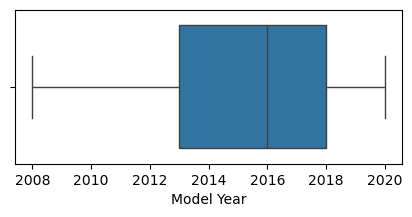

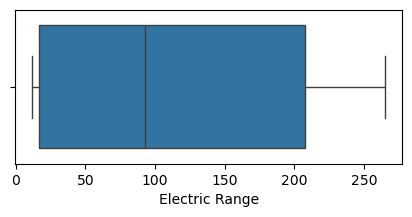

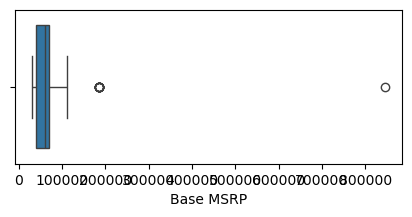

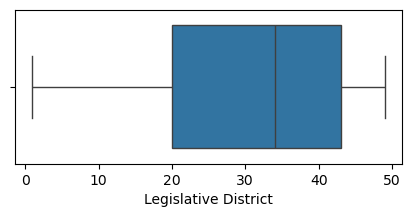

In [117]:
for i in df_copy2.select_dtypes(['int','float']).columns:
    plt.figure(figsize=(5,2))
    sns.boxplot(data=df_copy2,x=i);

### As we can see only Base MSRP have outliers

In [119]:
# A.IQR Method (Interquartile Range)
Q1 = df_copy2['Base MSRP'].quantile(0.25)
Q3 = df_copy2['Base MSRP'].quantile(0.75)
IQR = Q3 - Q1
# Define bounds
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
lower,upper

(-4862.5, 114757.5)

In [121]:
# Filter out outliers
df_copy2[(df_copy2['Base MSRP'] <= lower) | (df_copy2['Base MSRP'] >= upper)]

,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Electric Utility
219,2018,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,184400,47.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
221,2018,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,184400,18.0,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...
236,2018,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,184400,17.0,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...
600,2018,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,184400,41.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
882,2018,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,184400,45.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
941,2018,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,184400,33.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
1185,2015,PORSCHE,918,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,12,845000,48.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
1626,2018,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,184400,17.0,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...
1755,2018,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,184400,41.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
2802,2018,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,184400,41.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [123]:
df_copy2['Base MSRP'].describe()

count      3344.000000
mean      57078.250598
std       22795.518132
min       31950.000000
25%       39995.000000
50%       59900.000000
75%       69900.000000
max      845000.000000
Name: Base MSRP, dtype: float64

In [125]:
df_copy2['Base MSRP'] =np.where(df_copy2['Base MSRP']<= lower,df_copy2['Base MSRP'].median(),df_copy2['Base MSRP'])
df_copy2['Base MSRP'] =np.where(df_copy2['Base MSRP']>= upper,df_copy2['Base MSRP'].median(),df_copy2['Base MSRP'])

In [127]:
 df_copy2[(df_copy2['Base MSRP'] <= lower) | (df_copy2['Base MSRP'] >= upper)]

,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Electric Utility


#### All outliers in Base MSRP are treated 

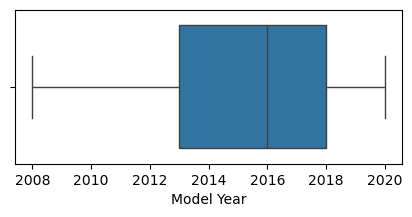

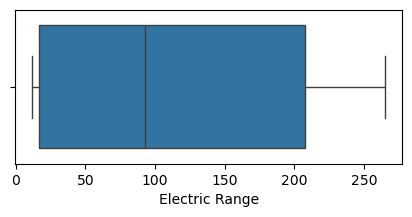

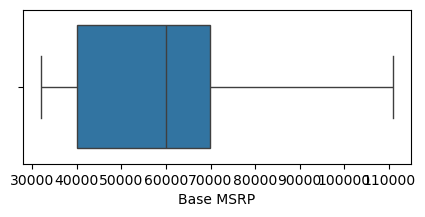

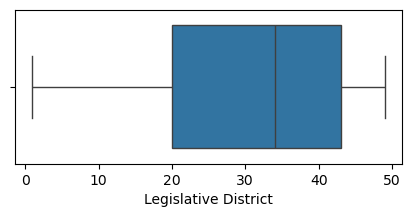

In [131]:
for i in df_copy2.select_dtypes(['int','float']).columns:
    plt.figure(figsize=(5,2))
    sns.boxplot(data=df_copy2,x=i);

In [135]:
df_copy2.to_csv('df_c2.csv', index=False)


#### C.Percentile Capping (Winsorization)
from scipy.stats.mstats import winsorize

Winsorize at 5th and 95th percentile

df['capped_age'] = winsorize(df['Age'], limits=[0.05, 0.05])

#### D. Isolation Forest (Multivariate)
from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination=0.1)

df['outlier'] = clf.fit_predict(df[['Age']])

df_filtered = df[df['outlier'] == 1]

print(df_filtered)

#### E.Local Outlier Factor (LOF)
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20)

df['outlier'] = lof.fit_predict(df[['Age']])

df_filtered = df[df['outlier'] == 1]

print(df_filtered)

##### Comparison Summary
| Method           | Speed     | Interpretability | Works on Multivariate | Scikit-learn Support |
| ---------------- | --------- | ---------------- | --------------------- | -------------------- |
| IQR              | ✅ Fast    | ✅ Easy           | ❌ No                  | ❌ No                 |
| Z-Score          | ✅ Fast    | ✅ Easy           | ❌ No                  | ❌ No                 |
| Winsorization    | ✅ Fast    | ✅ Easy           | ❌ No                  | ❌ No (in `scipy`)    |
| Isolation Forest | ⚠️ Slower | ✅ Moderate       | ✅ Yes                 | ✅ Yes                |
| LOF              | ⚠️ Slower | ⚠️ Hard          | ✅ Yes                 | ✅ Yes                |


## 3.5 Encoding 

Encoding is the process of converting categorical variables (text labels or categories) into a numerical format, so they can be used in machine learning models (which require numerical input).

Types of Categorical Variables
* Nominal – No natural order. E.g., Gender, Color, Country
* Ordinal – Has a meaningful order. E.g., Size (Small < Medium < Large), Rating (Low < Medium < High)

In [137]:
df1= pd.read_csv('df_c2.csv')

In [139]:
df1.head(3)

,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Electric Utility
0,2017,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,32250.0,22.0,PUGET SOUND ENERGY INC
1,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950.0,32.0,PUGET SOUND ENERGY INC
2,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900.0,14.0,PACIFICORP


In [141]:
cat_variables= df1.select_dtypes('object')
num_variables= df1.select_dtypes(['int','float'])

In [143]:
cat_variables.columns

Index(['Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
       'Electric Utility'],
      dtype='object')

In [145]:
cat_variables.head()

,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Utility
0,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,PUGET SOUND ENERGY INC
1,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,PUGET SOUND ENERGY INC
2,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,PACIFICORP
3,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,PUGET SOUND ENERGY INC
4,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)


In [147]:
num_variables.columns

Index(['Model Year', 'Electric Range', 'Base MSRP', 'Legislative District'], dtype='object')

In [149]:
num_variables.head()

,Model Year,Electric Range,Base MSRP,Legislative District
0,2017,93,32250.0,22.0
1,2016,93,31950.0,32.0
2,2013,208,69900.0,14.0
3,2013,208,69900.0,26.0
4,2017,14,44100.0,11.0


Note
* Nominal features with low cardinality ===>> Gender, Profession, Marital_status,Personal_loan,House_loan,Partner_working,Make
* Nominal features with high cardinality ===>> 
* Ordinal features ===>> Education
* cardinalitiy= no. of columns and category
* encoding- catrgorical data ko numerical me change krna
* we use pd.catagorical for ordinal encoding
*cat_variables['Education']=pd.Categorical(cat_variables['Education'],ordered= False).codes

In [151]:
# 2. Nominal encoding
nominal_features=['Make','Model','Electric Utility']
for i in nominal_features:
    print(i,";")
    print(pd.Categorical(cat_variables[i],ordered= False))
    print(pd.Categorical(cat_variables[i],ordered= False).codes)
    print('----------------------------------------')
    cat_variables[i]=pd.Categorical(cat_variables[i],ordered= False).codes

Make ;
['KIA', 'KIA', 'TESLA', 'TESLA', 'BMW', ..., 'KIA', 'KIA', 'TESLA', 'VOLVO', 'BMW']
Length: 3344
Categories (11, object): ['BMW', 'CADILLAC', 'CHRYSLER', 'FISKER', ..., 'SUBARU', 'TESLA', 'VOLVO', 'WHEEGO ELECTRIC CARS']
[4 4 8 ... 8 9 0]
----------------------------------------
Model ;
['SOUL EV', 'SOUL', 'MODEL S', 'MODEL S', '330E', ..., 'SOUL', 'SOUL EV', 'MODEL S', 'XC60', '330E']
Length: 3344
Categories (18, object): ['330E', '530E', '740E', '918', ..., 'SOUL EV', 'WHEEGO', 'XC60', 'XC90']
[14 13  9 ...  9 16  0]
----------------------------------------
Electric Utility ;
['PUGET SOUND ENERGY INC', 'PUGET SOUND ENERGY INC', 'PACIFICORP', 'PUGET SOUND ENERGY INC', 'CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)', ..., 'PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)', 'PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM C..., 'BONNEVILLE POWER ADMINISTRATION||CITY OF TACO..., 'PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)', 'PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)']
Length: 3344


In [153]:
pd.get_dummies(cat_variables[['Electric Vehicle Type','Clean Alternative Fuel Vehicle (CAFV) Eligibility']],dtype='int')

,Electric Vehicle Type_Battery Electric Vehicle (BEV),Electric Vehicle Type_Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle (CAFV) Eligibility_Clean Alternative Fuel Vehicle Eligible,Clean Alternative Fuel Vehicle (CAFV) Eligibility_Not eligible due to low battery range
0,1,0,1,0
1,1,0,1,0
2,1,0,1,0
3,1,0,1,0
4,0,1,0,1
...,...,...,...,...
3339,1,0,1,0
3340,1,0,1,0
3341,1,0,1,0
3342,0,1,0,1


In [155]:
for i in ['Electric Vehicle Type','Clean Alternative Fuel Vehicle (CAFV) Eligibility']:
    print(pd.get_dummies(cat_variables[i],dtype='int'))

      Battery Electric Vehicle (BEV)  Plug-in Hybrid Electric Vehicle (PHEV)
0                                  1                                       0
1                                  1                                       0
2                                  1                                       0
3                                  1                                       0
4                                  0                                       1
...                              ...                                     ...
3339                               1                                       0
3340                               1                                       0
3341                               1                                       0
3342                               0                                       1
3343                               0                                       1

[3344 rows x 2 columns]
      Clean Alternative Fuel Vehicle Eligible  \
0 

In [157]:
cat_variables

,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Utility
0,4,14,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,48
1,4,13,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,48
2,8,9,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,43
3,8,9,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,48
4,0,0,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,37
...,...,...,...,...,...
3339,4,13,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,49
3340,4,14,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,50
3341,8,9,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,12
3342,9,16,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,49


In [159]:
cat_variables_encoded= pd.get_dummies(cat_variables, columns=['Electric Vehicle Type','Clean Alternative Fuel Vehicle (CAFV) Eligibility'], dtype=int)

In [161]:
cat_variables_encoded.head()

,Make,Model,Electric Utility,Electric Vehicle Type_Battery Electric Vehicle (BEV),Electric Vehicle Type_Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle (CAFV) Eligibility_Clean Alternative Fuel Vehicle Eligible,Clean Alternative Fuel Vehicle (CAFV) Eligibility_Not eligible due to low battery range
0,4,14,48,1,0,1,0
1,4,13,48,1,0,1,0
2,8,9,43,1,0,1,0
3,8,9,48,1,0,1,0
4,0,0,37,0,1,0,1


In [163]:
df_encoded=pd.concat([num_variables,cat_variables_encoded], axis=1,)
df_encoded.head()

,Model Year,Electric Range,Base MSRP,Legislative District,Make,Model,Electric Utility,Electric Vehicle Type_Battery Electric Vehicle (BEV),Electric Vehicle Type_Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle (CAFV) Eligibility_Clean Alternative Fuel Vehicle Eligible,Clean Alternative Fuel Vehicle (CAFV) Eligibility_Not eligible due to low battery range
0,2017,93,32250.0,22.0,4,14,48,1,0,1,0
1,2016,93,31950.0,32.0,4,13,48,1,0,1,0
2,2013,208,69900.0,14.0,8,9,43,1,0,1,0
3,2013,208,69900.0,26.0,8,9,48,1,0,1,0
4,2017,14,44100.0,11.0,0,0,37,0,1,0,1


In [167]:
df_encoded.to_csv('df_encoded1', index=False)

##### Common encoding techniques:
| Encoding Method      | Type of Data | Pros                  | Cons                             |
| -------------------- | ------------ | --------------------- | -------------------------------- |
| Label Encoding       | Ordinal      | Simple                | Imposes order on nominal data    |
| One-Hot Encoding     | Nominal      | No order imposed      | High dimensionality              |
| Ordinal Encoding     | Ordinal      | Preserves order       | You must define the order        |
| Frequency Encoding   | Nominal      | Simple, compact       | May mislead the model            |
| Target/Mean Encoding | Nominal      | Can boost performance | Risk of overfitting/data leakage |


#### Difference in `pd.Categorical` technique and Sklearn's `LabelEncoder` / `OrdinalEncoder`
| Feature                    | `pd.Categorical`      | `LabelEncoder` / `OrdinalEncoder` |
| -------------------------- | --------------------- | --------------------------------- |
| Built into Pandas          | ✅ Yes                 | ❌ No                              |
| Easy for quick exploration | ✅ Very                | ➖ Slightly more verbose           |
| Custom category ordering   | ✅ Yes                 | ✅ Yes                             |
| Part of sklearn pipelines  | ❌ Not natively        | ✅ Integrates well                 |
| Handles unknown values     | ❌ Fails or assigns -1 | ✅ Can handle with parameters      |


## 3.6 Train Test Split 

In [11]:
df_TrainTestSplit= pd.read_csv('df_encoded')

In [13]:
df_TrainTestSplit.head()

,Model Year,Electric Range,Base MSRP,Legislative District,Make,Model,Electric Utility,Electric Vehicle Type_Battery Electric Vehicle (BEV),Electric Vehicle Type_Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle (CAFV) Eligibility_Clean Alternative Fuel Vehicle Eligible,Clean Alternative Fuel Vehicle (CAFV) Eligibility_Not eligible due to low battery range
0,2017,93,32250.0,22.0,4,14,48,1,0,1,0
1,2016,93,31950.0,32.0,4,13,48,1,0,1,0
2,2013,208,69900.0,14.0,8,9,43,1,0,1,0
3,2013,208,69900.0,26.0,8,9,48,1,0,1,0
4,2017,14,44100.0,11.0,0,0,37,0,1,0,1


In [15]:
X = df_TrainTestSplit.drop('Base MSRP', axis=1)  
y = df_TrainTestSplit['Base MSRP']              


In [17]:
X.head()

,Model Year,Electric Range,Legislative District,Make,Model,Electric Utility,Electric Vehicle Type_Battery Electric Vehicle (BEV),Electric Vehicle Type_Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle (CAFV) Eligibility_Clean Alternative Fuel Vehicle Eligible,Clean Alternative Fuel Vehicle (CAFV) Eligibility_Not eligible due to low battery range
0,2017,93,22.0,4,14,48,1,0,1,0
1,2016,93,32.0,4,13,48,1,0,1,0
2,2013,208,14.0,8,9,43,1,0,1,0
3,2013,208,26.0,8,9,48,1,0,1,0
4,2017,14,11.0,0,0,37,0,1,0,1


In [19]:
y

0       32250.0
1       31950.0
2       69900.0
3       69900.0
4       44100.0
         ...   
3339    31950.0
3340    32250.0
3341    69900.0
3342    52900.0
3343    44100.0
Name: Base MSRP, Length: 3344, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

## 3.7 Scaling
* Why Feature Scaling is Important:

Many machine learning algorithms (like KNN, SVM, Gradient Descent-based models, Neural Networks) compute distances or rely on the magnitude of features. If one feature has a large range and another has a small range, the model might become biased toward the feature with the larger range.

##### Most common techniques:
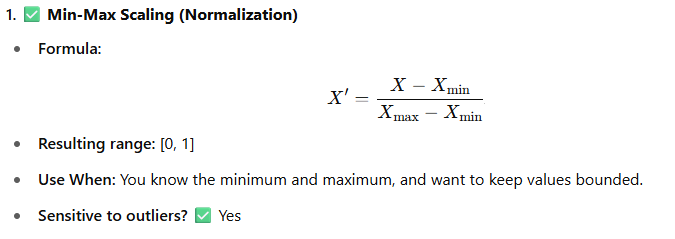
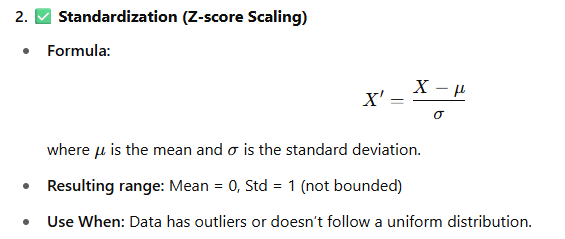

In [25]:
from sklearn.preprocessing import StandardScaler

# Choose numeric columns you want to scale
scale_cols = ['Electric Range', 'Legislative District']

# Create a scaler
scaler = StandardScaler()

# Fit on training data only
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])

# Transform test data using the same scaler
X_test[scale_cols] = scaler.transform(X_test[scale_cols])


#### Summary Table of most popular methods;
| Method          | Range    | Affected by Outliers | Use Case                            |
| --------------- | -------- | -------------------- | ----------------------------------- |
| Min-Max Scaling | \[0, 1]  | ✅ Yes                | Image data, bounded values          |
| Standardization | \~N(0,1) | ❌ Less               | Linear models, SVM, Neural Networks |
| Robust Scaling  | Depends  | ❌ No                 | Data with outliers                  |
| MaxAbs Scaling  | \[-1, 1] | ❌ Less               | Sparse data (e.g., NLP features)    |


# 4-Model Building (Regression), Evaluation & Tuning

* Regression algorithms
    * Linear Regression
    * KNN
    * Decision Trees (CART)
    * Random Forest
    * Boosting - Adaboost, Gboost, XGboost
* Model Evaluation
    * Regression metrics: MAE, MSE, RMSE, R²
* Model Tuning
    * GridSearchCV
    * RandomSearchCV

### 4.1 Model Training

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
# pip install xgboost 
from xgboost import XGBRegressor

In [36]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### 4.2 Model Evaluation

In [39]:
#accuracy
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.9999920643843435
MSE: 2208.925422272066


In [41]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

In [43]:
x_trainFinal = X_train
x_valFinal = X_test
y_trainFinal = y_train
y_valFinal = y_test


In [45]:

# Evaluation loop
results = []
for name, model in models.items():
    model.fit(x_trainFinal, y_trainFinal)

    y_train_pred = model.predict(x_trainFinal)
    y_val_pred = model.predict(x_valFinal)

    rmse_train = np.sqrt(mean_squared_error(y_trainFinal, y_train_pred))
    r2_train = r2_score(y_trainFinal, y_train_pred)

    rmse_val = np.sqrt(mean_squared_error(y_valFinal, y_val_pred))
    r2_val = r2_score(y_valFinal, y_val_pred)

    results.append({
        "Model": name,
        "Train_RMSE": rmse_train,
        "Train_R²": r2_train,
        "Val_RMSE": rmse_val,
        "Val_R²": r2_val
    })

# Results as DataFrame
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="Val_RMSE"))

               Model   Train_RMSE  Train_R²     Val_RMSE    Val_R²
2            XGBoost     0.023734  1.000000     0.118045  1.000000
1      Random Forest   310.265967  0.999664    46.999207  0.999992
0  Linear Regression  9532.206244  0.682952  8674.927513  0.729647


In [47]:
scaled_train = X_train
scaled_val = X_test


In [49]:
# Build and train model
LR = LinearRegression()
LR.fit(scaled_train, y_train)

# Predict
y_train_pred = LR.predict(scaled_train)
y_val_pred = LR.predict(scaled_val)

# Evaluate
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

rmse_val = np.sqrt(mean_squared_error(y_test, y_val_pred))
r2_val = r2_score(y_test, y_val_pred)

print("Train RMSE:", rmse_train, "| Train R2:", r2_train)
print("Test RMSE:", rmse_val, "| Test R2:", r2_val)


Train RMSE: 9532.206243933066 | Train R2: 0.6829522460592197
Test RMSE: 8674.927513487362 | Test R2: 0.7296469451361405
